### 1.1 READING, WRITING, UPLOADING RAW DATA

In [ ]:
### WRITE RAW FILES INTO THREE SINGLE TEXT FILES.

import pandas as pd
import numpy as np
import glob as glob

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM430.Project\04112016WinningPrediction\04112016 Uploaded data\hdb\*')

with open("HDB.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

### Reads hdb files into one txt file. 

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM430.Project\04112016WinningPrediction\04112016 Uploaded data\hrooster\*')

with open("hrooster.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())
            
### Reads hrooster hands into one txt file.

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM430.Project\04112016WinningPrediction\04112016 Uploaded data\pdb\*')

with open("pdb.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())
            
### Reads players actions into one txt file.

In [ ]:
with open("hdb.txt") as myfile:
    head = [next(myfile) for x in range(10)]
print(head)

In [ ]:
with open("hrooster.txt") as myfile2:
    head = [next(myfile2) for x in range(10)]
print(head)

In [ ]:
with open("pdb.txt") as myfile3:
    head = [next(myfile3) for x in range(10)]
print(head)

In [1]:
### READ DATA INTO PANDAS DATA FRAMES.

import pandas as pd
import numpy as np
import glob as glob

hdb_RAW = pd.read_csv('HDB_RAW_DATA_TABLE.csv', dtype={'PLAYERSPERPOT_F': str, 'PLAYERSPERPOT_T': str, 'PLAYERSPERPOT_R': str, 'PLAYERSPERPOT_SHDW': str, 'FLOP_1': str,                                               
                                               'FLOP_2': str, 'FLOP_3': str, 'TURN': str, 'RIVER': str})

pdb_RAW = pd.read_csv('PDB_DATA_TABLE.csv', dtype={'NAME_ID':str, 'PRFLOP_A': str, 'PRTURN_A': str, 'PRRIVER_A':str, 'PRSHDW':str, 'POCKETCARD_1':str, 'POCKETCARD_2':str} )

hrooster_RAW = pd.read_csv('HROOSTER_RAW_DATA_TABLE.csv', dtype = str)

In [2]:
hdb_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 20 columns):
TIMESTAMP_ID          10168 non-null int64
HAND_ID               10168 non-null int64
PLAYERS_N             10168 non-null int64
PLAYERSPERPOT_F       10168 non-null object
PLAYERSPERPOT_T       10168 non-null object
PLAYERSPERPOT_R       10168 non-null object
PLAYERSPERPOT_SHDW    10168 non-null object
FLOP_1                3671 non-null object
FLOP_2                3671 non-null object
FLOP_3                3671 non-null object
TURN                  1929 non-null object
RIVER                 1250 non-null object
PLAYERS_PRFLOP        10168 non-null int64
POT_PRFLOP            10168 non-null int64
PLAYERS_PRTURN        10168 non-null int64
POT_PRTURN            10168 non-null int64
PLAYERS_PRRIVER       10168 non-null int64
POT_PRRIVER           10168 non-null int64
PLAYERS_PRSHDW        10168 non-null int64
POT_PRSHDW            10168 non-null int64
dtypes: int64(11), object(9

In [3]:
# Drop the unneeded columns. (cards are not being analyzed, and players per pot had already been split)

hdb_RED = hdb_RAW.drop(['FLOP_1', 'FLOP_2', 'FLOP_3', 'TURN', 'RIVER', 'PLAYERSPERPOT_F', 'PLAYERSPERPOT_T','PLAYERSPERPOT_R','PLAYERSPERPOT_SHDW'], axis=1)

In [4]:
hdb_RED.head()

,TIMESTAMP_ID,HAND_ID,PLAYERS_N,PLAYERS_PRFLOP,POT_PRFLOP,PLAYERS_PRTURN,POT_PRTURN,PLAYERS_PRRIVER,POT_PRRIVER,PLAYERS_PRSHDW,POT_PRSHDW
0,800178932,1,2,0,0,0,0,0,0,1,6417
1,800178954,2,3,2,200,0,0,0,0,1,1000
2,800178980,3,3,2,450,2,850,2,850,1,1300
3,800179029,4,3,3,300,2,600,0,0,1,900
4,800179062,5,3,0,0,0,0,0,0,1,150


In [5]:
pdb_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26380 entries, 0 to 26379
Data columns (total 13 columns):
NAME_ID         26380 non-null object
TIMESTAMP_ID    26380 non-null int64
PLAYERS_POS     26380 non-null int64
PLAYERS_N       26380 non-null int64
PRFLOP_A        26380 non-null object
PRTURN_A        26380 non-null object
PRRIVER_A       26380 non-null object
PRSHWD_A        26380 non-null object
BANKROLL        26380 non-null int64
ACTION          26380 non-null int64
WINNINGS        26380 non-null int64
POCKETCARD_1    1753 non-null object
POCKETCARD_2    1753 non-null object
dtypes: int64(6), object(7)
memory usage: 2.6+ MB


In [6]:
# Drop columns of no interest

pdb_RED = pdb_RAW.drop(['POCKETCARD_1', 'POCKETCARD_2'], axis=1)

In [7]:
hrooster_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 11 columns):
TIMESTAMP_ID    10168 non-null object
N_PLAYERS       10168 non-null object
NAME_1          10168 non-null object
NAME_2          10168 non-null object
NAME_3          4147 non-null object
NAME_4          1510 non-null object
NAME_5          793 non-null object
NAME_6          358 non-null object
NAME_7          135 non-null object
NAME_8          25 non-null object
NAME_9          2 non-null object
dtypes: object(11)
memory usage: 873.9+ KB


In [8]:
### Transposing the rooster data and sorting other data sets on timestamp.

hrooster_RED_T = pd.melt(hrooster_RAW, id_vars=['TIMESTAMP_ID'], value_vars=['NAME_1', 'NAME_2', 'NAME_3', 'NAME_4', 'NAME_5', 'NAME_6', 'NAME_7', 'NAME_8', 'NAME_9'])
hrooster_RED_T.sort(columns=['TIMESTAMP_ID'], ascending = True, inplace=True)
pdb_RED.sort(columns=['TIMESTAMP_ID'], ascending = True, inplace=True)
hdb_RED.sort(columns=['TIMESTAMP_ID'], ascending = True, inplace=True)

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [9]:
hrooster_RED_T.rename(columns={'variable': 'ID', 'value': 'NAME_ID'}, inplace=True)

In [10]:
hrooster_RED_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91512 entries, 0 to 21599
Data columns (total 3 columns):
TIMESTAMP_ID    91512 non-null object
ID              91512 non-null object
NAME_ID         27306 non-null object
dtypes: object(3)
memory usage: 2.8+ MB


### 1.2 CLEANING DATA AND FEATURE ENGINEERING.

In [11]:
### SETTING INDEXES

hdb_RED.set_index(['TIMESTAMP_ID'], inplace=True)
pdb_RED.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)
hrooster_RED_T.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)

In [12]:
# hdb_RED.drop(['HAND_ID'], axis=1, inplace=True) # ON SECOND RUN HAND_ID HAD NOT BEEN DROPPED (WE THINK IT MIGHT BE AN IMPORTANT VARIABLE)

In [13]:
### Need to create 4 columns for 4 different action types. Agressive: bet (B or b), raise(r or A) as a last character of a string.
### Passive: check (k) or call (c) as the last caracter of a string. Submissive: fold (f) or Q (Q) as a last chracter of a string. 
### Deceptive: fold after bet or raise; raise after check. 

import re

pdb_RED['PRFLOP_agro']=pdb_RED['PRFLOP_A'].str.contains('[bBrA]$', regex=True).astype(int)
pdb_RED['PRFLOP_pass']=pdb_RED['PRFLOP_A'].str.contains('[kc]$', regex=True).astype(int)
pdb_RED['PRFLOP_sub']=pdb_RED['PRFLOP_A'].str.contains('[fQ]$', regex=True).astype(int)
pdb_RED['PRFLOP_decept']=pdb_RED['PRFLOP_A'].str.contains('(Bf)$|(bf)$|(rf)$|(cr)$|(Br)$|(cA)$', regex=True).astype(int)



C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Deceptive action considred as going from aggresive into submissive, or passive into aggressive, (it is not possible to go from submissive into aggresive).


In [14]:
### BANKROLL AS THE PROPORTION OF A TOTAL TABLE BANKROLL

pdb_RED['BANKROLL_PROP']= pdb_RED['BANKROLL']/pdb_RED['BANKROLL'].groupby(level=0).sum()

In [15]:
pdb_RED.rename(columns={'PLAYERS_POS': 'PLAYERS_N', 'PLAYERS_N': 'PLAYERS_POS'}, inplace=True) # Little adjustment

In [16]:
### CHIP COMMITEMENT OF AN OPPONENT(s) AS A PROPORTION OF TABLE BANKROLL

hdb_RED['OPP_ACTION_PROP']=(hdb_RED['POT_PRFLOP']/hdb_RED['PLAYERS_PRFLOP'])*(hdb_RED['PLAYERS_PRFLOP']-1)/pdb_RED['BANKROLL'].groupby(level=0).sum()

In [17]:
### NUMBER OF HANDS PLAYED BY THE PLAYER (TWO INDEXES)

pdb_RED.reset_index(inplace=True)
pdb_RED.set_index(['TIMESTAMP_ID'], inplace=True)
pdb_RED.sort_index(inplace=True)
pdb_RED['HANDS_PLAYED']=pdb_RED.groupby('NAME_ID').cumcount()
pdb_RED.reset_index(inplace=True)
pdb_RED.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)

In [18]:
### NUMBER OF HANDS IN THE PAST WAS THE LAST VICTORY

g = pdb_RED.loc[:, ['WINNINGS', 'HANDS_PLAYED']]

g.reset_index(inplace=True)

g.sort(['NAME_ID', 'HANDS_PLAYED'], inplace=True)

res = []
count = 0
for win in g['WINNINGS']:
    if win == 0:
        res.append(count)
        count+=1
    else:
        res.append(count)
        count = 1
g['VICTORY_LAST']= res

print(g['VICTORY_LAST'].mean()) # Get the mean amount of hands until first victory
print(g['VICTORY_LAST'].std())

g['VICTORY_LAST'] = g['VICTORY_LAST'].where(~((g['WINNINGS'] == 0) & (g['HANDS_PLAYED'] <= 2)), 0) # Mean is 3, therefore we take out first 3 hands of every player.
g['VICTORY_LAST'] = g['VICTORY_LAST'].replace(0, np.nan)


3.0607278241091738
3.1500185724735195


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [19]:
### CALCULATE LAGGED AGGRESIVENESS/PASSIVNESS/SUBMISIVENESS/DECEPTIVENESS 

s = pdb_RED.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub', 'PRFLOP_decept', 'HANDS_PLAYED']]
s.reset_index(inplace=True)

s.sort(['NAME_ID', 'HANDS_PLAYED'], inplace=True)
s.set_index(['HANDS_PLAYED'], inplace=True)


# First lags

s['PRFLOP_agro_lag1']=s.groupby('NAME_ID')['PRFLOP_agro'].apply(lambda x:x.rolling(center=False,window=1, min_periods=1).sum().shift(1))
s['PRFLOP_pass_lag1']=s.groupby('NAME_ID')['PRFLOP_pass'].apply(lambda x:x.rolling(center=False,window=1, min_periods=1).sum().shift(1))
s['PRFLOP_sub_lag1']=s.groupby('NAME_ID')['PRFLOP_sub'].apply(lambda x:x.rolling(center=False,window=1, min_periods=1).sum().shift(1))
s['PRFLOP_decept_lag1']=s.groupby('NAME_ID')['PRFLOP_decept'].apply(lambda x:x.rolling(center=False,window=1, min_periods=1).sum().shift(1))

# Third lags

s['PRFLOP_agro_lag3']=(s.groupby('NAME_ID')['PRFLOP_agro'].apply(lambda x:x.rolling(center=False,window=3, min_periods=3).sum().shift(1))/3)
s['PRFLOP_pass_lag3']=(s.groupby('NAME_ID')['PRFLOP_pass'].apply(lambda x:x.rolling(center=False,window=3, min_periods=3).sum().shift(1))/3)
s['PRFLOP_sub_lag3']=(s.groupby('NAME_ID')['PRFLOP_sub'].apply(lambda x:x.rolling(center=False,window=3, min_periods=3).sum().shift(1))/3)
s['PRFLOP_decept_lag3']=(s.groupby('NAME_ID')['PRFLOP_decept'].apply(lambda x:x.rolling(center=False,window=3, min_periods=3).sum().shift(1))/3)
# Fifth lags

s['PRFLOP_agro_lag5']=(s.groupby('NAME_ID')['PRFLOP_agro'].apply(lambda x:x.rolling(center=False,window=5, min_periods=5).sum().shift(1))/5)
s['PRFLOP_pass_lag5']=(s.groupby('NAME_ID')['PRFLOP_pass'].apply(lambda x:x.rolling(center=False,window=5, min_periods=5).sum().shift(1))/5)
s['PRFLOP_sub_lag5']=(s.groupby('NAME_ID')['PRFLOP_sub'].apply(lambda x:x.rolling(center=False,window=5, min_periods=5).sum().shift(1))/5)
s['PRFLOP_decept_lag5']=(s.groupby('NAME_ID')['PRFLOP_decept'].apply(lambda x:x.rolling(center=False,window=5, min_periods=5).sum().shift(1))/5)

# Tenth lags

s['PRFLOP_agro_lag10']=(s.groupby('NAME_ID')['PRFLOP_agro'].apply(lambda x:x.rolling(center=False,window=10, min_periods=10).sum().shift(1))/10)
s['PRFLOP_pass_lag10']=(s.groupby('NAME_ID')['PRFLOP_pass'].apply(lambda x:x.rolling(center=False,window=10, min_periods=10).sum().shift(1))/10)
s['PRFLOP_sub_lag10']=(s.groupby('NAME_ID')['PRFLOP_sub'].apply(lambda x:x.rolling(center=False,window=10, min_periods=10).sum().shift(1))/10)
s['PRFLOP_decept_lag10']=(s.groupby('NAME_ID')['PRFLOP_decept'].apply(lambda x:x.rolling(center=False,window=10, min_periods=10).sum().shift(1))/10)


s.info()

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26380 entries, 0 to 111
Data columns (total 22 columns):
TIMESTAMP_ID           26380 non-null int64
NAME_ID                26380 non-null object
PRFLOP_agro            26380 non-null int32
PRFLOP_pass            26380 non-null int32
PRFLOP_sub             26380 non-null int32
PRFLOP_decept          26380 non-null int32
PRFLOP_agro_lag1       26293 non-null float64
PRFLOP_pass_lag1       26293 non-null float64
PRFLOP_sub_lag1        26293 non-null float64
PRFLOP_decept_lag1     26293 non-null float64
PRFLOP_agro_lag3       26127 non-null float64
PRFLOP_pass_lag3       26127 non-null float64
PRFLOP_sub_lag3        26127 non-null float64
PRFLOP_decept_lag3     26127 non-null float64
PRFLOP_agro_lag5       25964 non-null float64
PRFLOP_pass_lag5       25964 non-null float64
PRFLOP_sub_lag5        25964 non-null float64
PRFLOP_decept_lag5     25964 non-null float64
PRFLOP_agro_lag10      25568 non-null float64
PRFLOP_pass_lag10      25568 n

In [20]:
### LAST ACTION OF AN OPPONENT (THIS WAS UPDATED FIRST, WE ARE NOT INTERESTED IN OPPONENT DECEPTIVNESS, IT IS MULTI STEP ACTION)

d = pdb_RED.loc[:, ['PLAYERS_POS', 'HANDS_PLAYED', 'PRFLOP_A', 'PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub', 'PRFLOP_decept']]

d.reset_index(inplace=True)

d.sort_values(by=['TIMESTAMP_ID', 'PLAYERS_POS'], inplace=True)


d['PRFLOP_agro_o'] = d['PRFLOP_agro'].shift(1).where(~(d['PLAYERS_POS'] == 1), np.nan)
d['PRFLOP_pass_o'] = d['PRFLOP_pass'].shift(1).where(~(d['PLAYERS_POS'] == 1), np.nan)
d['PRFLOP_sub_o'] = d['PRFLOP_sub'].shift(1).where(~(d['PLAYERS_POS'] == 1), np.nan)

Deceptivness made mutually exclusive in variables of interest. Deceptivness had been removed from recent opponent actions. Deceptivness had been left as a fourth variable in lagged variable table. (UPDATE ON SECOND RUN) 

In [21]:
### TRANSFORM if there is 1 in more than one column along with PRFLOP_decept , leave only PRFLOP_decept. (DELETED ON THE SECOND RUN WHY DO EVEN NEED THIS???)

# d['PRFLOP_agro'] = d['PRFLOP_agro'].where(~((d['PRFLOP_agro'] == 1) & (d['PRFLOP_decept'] == 1)), 0)
# d['PRFLOP_pass'] = d['PRFLOP_pass'].where(~((d['PRFLOP_pass'] == 1) & (d['PRFLOP_decept'] == 1)), 0)
# d['PRFLOP_sub'] = d['PRFLOP_sub'].where(~((d['PRFLOP_sub'] == 1) & (d['PRFLOP_decept'] == 1)), 0)



In [22]:
pdb_RED.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26380 entries, (800178932, ShoelessJ) to (851473924, mark)
Data columns (total 15 columns):
PLAYERS_N        26380 non-null int64
PLAYERS_POS      26380 non-null int64
PRFLOP_A         26380 non-null object
PRTURN_A         26380 non-null object
PRRIVER_A        26380 non-null object
PRSHWD_A         26380 non-null object
BANKROLL         26380 non-null int64
ACTION           26380 non-null int64
WINNINGS         26380 non-null int64
PRFLOP_agro      26380 non-null int32
PRFLOP_pass      26380 non-null int32
PRFLOP_sub       26380 non-null int32
PRFLOP_decept    26380 non-null int32
BANKROLL_PROP    26380 non-null float64
HANDS_PLAYED     26380 non-null int64
dtypes: float64(1), int32(4), int64(6), object(4)
memory usage: 2.8+ MB


In [23]:
### DATA JOINING 1

s.reset_index(inplace=True)
s.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)

cols_to_use = s.columns - pdb_RED.columns
pdb_READY = pd.merge(pdb_RED, s[cols_to_use], how='outer', left_index=True, right_index=True)

pdb_READY.info()


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26380 entries, (800178932, ShoelessJ) to (851473924, mark)
Data columns (total 31 columns):
PLAYERS_N              26380 non-null int64
PLAYERS_POS            26380 non-null int64
PRFLOP_A               26380 non-null object
PRTURN_A               26380 non-null object
PRRIVER_A              26380 non-null object
PRSHWD_A               26380 non-null object
BANKROLL               26380 non-null int64
ACTION                 26380 non-null int64
WINNINGS               26380 non-null int64
PRFLOP_agro            26380 non-null int32
PRFLOP_pass            26380 non-null int32
PRFLOP_sub             26380 non-null int32
PRFLOP_decept          26380 non-null int32
BANKROLL_PROP          26380 non-null float64
HANDS_PLAYED           26380 non-null int64
PRFLOP_agro_lag1       26293 non-null float64
PRFLOP_agro_lag10      25568 non-null float64
PRFLOP_agro_lag3       26127 non-null float64
PRFLOP_agro_lag5       25964 non-null float64
PRFLOP_d

In [24]:
### DATA JOINING 2

g.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)

cols_to_use=g.columns - pdb_READY.columns
pdb_READY = pd.merge(pdb_READY, g[cols_to_use], how='outer', left_index=True, right_index=True)

pdb_READY.info()

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26380 entries, (800178932, ShoelessJ) to (851473924, mark)
Data columns (total 32 columns):
PLAYERS_N              26380 non-null int64
PLAYERS_POS            26380 non-null int64
PRFLOP_A               26380 non-null object
PRTURN_A               26380 non-null object
PRRIVER_A              26380 non-null object
PRSHWD_A               26380 non-null object
BANKROLL               26380 non-null int64
ACTION                 26380 non-null int64
WINNINGS               26380 non-null int64
PRFLOP_agro            26380 non-null int32
PRFLOP_pass            26380 non-null int32
PRFLOP_sub             26380 non-null int32
PRFLOP_decept          26380 non-null int32
BANKROLL_PROP          26380 non-null float64
HANDS_PLAYED           26380 non-null int64
PRFLOP_agro_lag1       26293 non-null float64
PRFLOP_agro_lag10      25568 non-null float64
PRFLOP_agro_lag3       26127 non-null float64
PRFLOP_agro_lag5       25964 non-null float64
PRFLOP_d

In [25]:
### DATA JOINING 3

d.reset_index(inplace=True)
d.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)
cols_to_use=d.columns - pdb_READY.columns

PDB_READY = pd.merge(pdb_READY, d[cols_to_use], how='outer', left_index=True, right_index=True)

PDB_READY.info()

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26380 entries, (800178932, ShoelessJ) to (851473924, mark)
Data columns (total 36 columns):
PLAYERS_N              26380 non-null int64
PLAYERS_POS            26380 non-null int64
PRFLOP_A               26380 non-null object
PRTURN_A               26380 non-null object
PRRIVER_A              26380 non-null object
PRSHWD_A               26380 non-null object
BANKROLL               26380 non-null int64
ACTION                 26380 non-null int64
WINNINGS               26380 non-null int64
PRFLOP_agro            26380 non-null int32
PRFLOP_pass            26380 non-null int32
PRFLOP_sub             26380 non-null int32
PRFLOP_decept          26380 non-null int32
BANKROLL_PROP          26380 non-null float64
HANDS_PLAYED           26380 non-null int64
PRFLOP_agro_lag1       26293 non-null float64
PRFLOP_agro_lag10      25568 non-null float64
PRFLOP_agro_lag3       26127 non-null float64
PRFLOP_agro_lag5       25964 non-null float64
PRFLOP_d

In [26]:
### DATA JOINING FINAL 

hdb_RED.head()
PDB_HDB = pd.merge(PDB_READY, hdb_RED, how='outer', left_index=True, right_index=True)
PDB_HDB.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26380 entries, (800178932, ShoelessJ) to (851473924, mark)
Data columns (total 47 columns):
PLAYERS_N_x            26380 non-null int64
PLAYERS_POS            26380 non-null int64
PRFLOP_A               26380 non-null object
PRTURN_A               26380 non-null object
PRRIVER_A              26380 non-null object
PRSHWD_A               26380 non-null object
BANKROLL               26380 non-null int64
ACTION                 26380 non-null int64
WINNINGS               26380 non-null int64
PRFLOP_agro            26380 non-null int32
PRFLOP_pass            26380 non-null int32
PRFLOP_sub             26380 non-null int32
PRFLOP_decept          26380 non-null int32
BANKROLL_PROP          26380 non-null float64
HANDS_PLAYED           26380 non-null int64
PRFLOP_agro_lag1       26293 non-null float64
PRFLOP_agro_lag10      25568 non-null float64
PRFLOP_agro_lag3       26127 non-null float64
PRFLOP_agro_lag5       25964 non-null float64
PRFLOP_d

In [27]:
### EXTRA TRANSFORMATION EXCLUDED. (FIRST RUN)


#PDB_HDB['OPP_ACTION_PROP']=(PDB_HDB['POT_PRFLOP']/PDB_HDB['PLAYERS_PRFLOP'])*(PDB_HDB['PLAYERS_POS']-1)/PDB_HDB['BANKROLL'].groupby(level=0).sum()
#T = PDB_HDB['ACTION'].where(~(PDB_HDB['POT_PRFLOP'] == 0), (PDB_HDB['POT_PRSHDW'])*(PDB_HDB['PLAYERS_POS']-1)/PDB_HDB['BANKROLL'].groupby(level=0).sum())
#PDB_HDB['OPP_ACTION_PROP'].fillna(T, inplace=True)

# !!! GIVES INCORRECT STUFF. COMMITMENT OF PLAYER NOT OF OPPONENTS. LEAVE OUT AS A RESULT OF INACURATE MEASUREMENT



In [28]:
### EXTRA TRANSFORMATION. SIZE OF THE LAST OUTCOME; LAGGED OUTCOME.

PDB_HDB['OUTCOME'] = PDB_HDB['WINNINGS']-PDB_HDB['ACTION']
PDB_HDB['OUTCOME']= PDB_HDB['OUTCOME']/PDB_HDB['BANKROLL']

In [29]:
c = PDB_HDB.loc[:,['HANDS_PLAYED', 'OUTCOME']]

In [30]:
c.reset_index(inplace=True)
c.sort(['NAME_ID', 'HANDS_PLAYED'], inplace=True)

#  s.sort(['NAME_ID', 'HANDS_PLAYED'], inplace=True)
#  s.set_index(['HANDS_PLAYED'], inplace=True)


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [31]:
c['OUTCOME_lag1']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=1, min_periods=0).mean().shift(1)))
c['OUTCOME_lag3']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=3, min_periods=0).mean().shift(1)))
c['OUTCOME_lag5']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=5, min_periods=0).mean().shift(1)))
c['OUTCOME_lag10']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=10, min_periods=0).mean().shift(1)))


c['OUTCOME_lag1_sum']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=1, min_periods=0).sum().shift(1)))
c['OUTCOME_lag3_sum']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=3, min_periods=0).sum().shift(1)))
c['OUTCOME_lag5_sum']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=5, min_periods=0).sum().shift(1)))
c['OUTCOME_lag10_sum']=(c.groupby('NAME_ID')['OUTCOME'].apply(lambda x:x.rolling(center=False,window=10, min_periods=0).sum().shift(1)))

Lagged outcome variables created as an extra engineering. Lag and sum. (as substitutes)

In [32]:
### EXTRA DATA JOINING.

c.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True)

cols_to_use = c.columns - PDB_HDB.columns

PDB_HDB = pd.merge(PDB_HDB, c[cols_to_use], how='outer', left_index=True, right_index=True)


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [33]:
PDB_HDB.drop(['PLAYERS_N_x', 'PRRIVER_A', 'PRSHWD_A', 'PRTURN_A', 'PLAYERS_PRTURN', 'POT_PRTURN', \
              'PLAYERS_PRRIVER', 'POT_PRRIVER', 'PLAYERS_PRSHDW', 'POT_PRSHDW', 'index' ], inplace=True, axis=1)

In [34]:
PDB_HDB.rename(columns={'PLAYERS_N_y': 'PLAYERS_N'}, inplace=True)

In [35]:
PDB_HDB.info

<bound method DataFrame.info of                         PLAYERS_POS PRFLOP_A  BANKROLL  ACTION  WINNINGS  \
TIMESTAMP_ID NAME_ID                                                       
800178932    ShoelessJ            2      BrA      6217    6217      6417   
             deadhead             1      Brf      5215     200         0   
800178954    ShoelessJ            1       Bc      6417     100         0   
             deadhead             3        f      5015       0         0   
             tvp                  2       Bk     14818     900      1000   
800178980    ShoelessJ            3        r      6317     400         0   
             deadhead             2       Bc      5015     850      1300   
             tvp                  1       Bf     14918      50         0   
800179029    ShoelessJ            2       Bk      5917     250         0   
             deadhead             1       Bc      5465     550       900   
             tvp                  3        c     14868  

### 1.4 DATA EXPLORATION.

In [36]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

colorColumn = []
for i in range(len(PDB_HDB)):
    if PDB_HDB["PRFLOP_agro"][i] == 1:
        colorColumn.append("#E83422")  # RED COLOUR
    elif PDB_HDB["PRFLOP_pass"][i] == 1:
        colorColumn.append("#3A55FF") # BLUE COLOUR
    elif PDB_HDB["PRFLOP_sub"][i] == 1 :
        colorColumn.append("#FFAD2E") # ORANGE
    else:
        colorColumn.append("#FFEE16") # YELLOW

In [41]:
# TAKING INDEPENDENT VARS ALONG WITH ENVIRONMENT VARIABLES

PDB_HDB_EN = PDB_HDB.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub', 'PRFLOP_decept', 'BANKROLL_PROP', 'PLAYERS_POS', 'PLAYERS_N', \
                            'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]

PDB_HDB_EN.corr(method='pearson')

import seaborn as sns

corr = PDB_HDB_EN.corr(method='pearson')

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('HEATMAP1')

NameError: name 'plt' is not defined

In [ ]:
PDB_HDB_EN.corr(method='pearson')



Borderline strong negative relationship between agression and opponent agressivenes. (0.4) Borderline strong negative relationship between agression and opponent submissivness. (0.4) Interesting strong positive relationship between oponent submisiveness and agresiveness (0.53). Strong negtative between position and deceptivness. Strong positive number of players, opponent agression and submissiveness (respectively 0.43; 0.44). Interesting medium positive opponent sub and sub.(-0.55) 

HIGH CORRELATION BETWEEN PLAYER NUMBER AND POSITION, LEADS TO SPURIOUS RELATIONSHIP, WE CHOSE TO EXCLUDE IT, IN FAVOUR OF RATIO, (better quality information as well, as it defines relational position). RATIO OF 1 late position, ration of less than 0.5 early position 0.5-75 middle position.

In [42]:
PDB_HDB_LAG = PDB_HDB.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub', 'PRFLOP_decept', 'PRFLOP_agro_lag1', 'PRFLOP_agro_lag5', 'PRFLOP_agro_lag10', \
                            'PRFLOP_decept_lag1', 'PRFLOP_decept_lag5', 'PRFLOP_decept_lag10', 'PRFLOP_pass_lag1', 'PRFLOP_pass_lag5', 'PRFLOP_pass_lag10', \
                             'PRFLOP_sub_lag1', 'PRFLOP_sub_lag5', 'PRFLOP_sub_lag10', \
                             'OUTCOME_lag1_sum', 'OUTCOME_lag5_sum', 'OUTCOME_lag10_sum', 'HAND_ID', 'HANDS_PLAYED', 'VICTORY_LAST']]

corr = PDB_HDB_LAG.corr(method='spearman')

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('HEATMAP2')

NameError: name 'plt' is not defined

In [43]:
PDB_HDB_LAG.corr(method='spearman')


,PRFLOP_agro,PRFLOP_pass,PRFLOP_sub,PRFLOP_decept,PRFLOP_agro_lag1,PRFLOP_agro_lag5,PRFLOP_agro_lag10,PRFLOP_decept_lag1,PRFLOP_decept_lag5,PRFLOP_decept_lag10,...,PRFLOP_pass_lag10,PRFLOP_sub_lag1,PRFLOP_sub_lag5,PRFLOP_sub_lag10,OUTCOME_lag1_sum,OUTCOME_lag5_sum,OUTCOME_lag10_sum,HAND_ID,HANDS_PLAYED,VICTORY_LAST
PRFLOP_agro,1.000000,-0.356470,-0.635584,-0.041373,0.074460,0.184837,0.234528,0.111586,0.187808,0.192863,...,-0.080843,-0.034247,-0.124914,-0.173397,0.026769,0.023759,0.004601,0.107898,0.145062,-0.099940
PRFLOP_pass,-0.356470,1.000000,-0.494749,-0.443441,-0.024675,-0.056646,-0.067004,-0.037314,-0.076334,-0.111509,...,0.118063,0.013373,-0.012052,-0.029452,-0.004816,-0.009236,-0.004587,-0.035986,-0.073414,0.031393
PRFLOP_sub,-0.635584,-0.494749,1.000000,0.404905,-0.048887,-0.125359,-0.163466,-0.072984,-0.111860,-0.087850,...,-0.022065,0.020813,0.126304,0.186079,-0.020925,-0.014473,-0.000491,-0.070624,-0.074264,0.067164
PRFLOP_decept,-0.041373,-0.443441,0.404905,1.000000,0.144130,0.163454,0.175855,-0.139007,0.071905,0.211722,...,-0.087165,-0.193532,-0.112284,-0.101672,0.070247,0.023851,0.012875,0.116866,0.146171,-0.162782
PRFLOP_agro_lag1,0.074460,-0.024675,-0.048887,0.144130,1.000000,0.526800,0.432015,-0.043487,0.114836,0.178519,...,-0.170001,-0.635741,-0.360721,-0.309225,0.505503,0.109637,0.043551,0.108677,0.144972,-0.642325
PRFLOP_agro_lag5,0.184837,-0.056646,-0.125359,0.163454,0.526800,1.000000,0.823357,0.108858,0.268630,0.352754,...,-0.314281,-0.345187,-0.666445,-0.578584,0.242910,0.186302,0.077818,0.202717,0.283941,-0.552630
PRFLOP_agro_lag10,0.234528,-0.067004,-0.163466,0.175855,0.432015,0.823357,1.000000,0.156687,0.356968,0.426772,...,-0.375098,-0.285930,-0.562680,-0.700155,0.184952,0.123701,0.089341,0.242982,0.342531,-0.470336
PRFLOP_decept_lag1,0.111586,-0.037314,-0.072984,-0.139007,-0.043487,0.108858,0.156687,1.000000,0.550139,0.419871,...,-0.191887,0.407333,0.092985,-0.002402,-0.303623,-0.030552,-0.011094,0.117289,0.145213,0.133420
PRFLOP_decept_lag5,0.187808,-0.076334,-0.111860,0.071905,0.114836,0.268630,0.356968,0.550139,1.000000,0.831153,...,-0.435529,0.128298,0.153643,-0.016185,-0.072726,-0.037946,-0.015962,0.253432,0.313957,-0.043283
PRFLOP_decept_lag10,0.192863,-0.111509,-0.087850,0.211722,0.178519,0.352754,0.426772,0.419871,0.831153,1.000000,...,-0.510706,-0.005001,-0.024048,-0.027965,-0.008802,0.003226,-0.015637,0.302448,0.376305,-0.157850


WEAK POSITIVE BETWEEN SUBMISIVENESS AND 5 lag agreesiveness, 10 lag agressiveness (0.23). Mostly, correlations fail to show any significant relationships as expected.

Other interesting observations is that number of hands played shows mediocre positve correlation with lagged deceptiveness, and aggresiveness at 5 hand lags. (0.31; 0.34)


In [44]:
### GET THE DATA FRAME CONTAINING COUNT VARIABLES OF PRFLOP ACTIONS

PRFLOP_agro_c = PDB_HDB['PRFLOP_agro'].sum()/len(PDB_HDB['PRFLOP_agro'])
PRFLOP_pass_c = PDB_HDB['PRFLOP_pass'].sum()/len(PDB_HDB['PRFLOP_pass'])
PRFLOP_sub_c = PDB_HDB['PRFLOP_sub'].sum()/len(PDB_HDB['PRFLOP_sub'])
PRFLOP_decept_c = PDB_HDB['PRFLOP_decept'].sum()/len(PDB_HDB['PRFLOP_decept'])

PRFLOP_A_C = [[PRFLOP_agro_c], [PRFLOP_pass_c], [PRFLOP_sub_c], [PRFLOP_decept_c]]
labels = ['PRFLOP_agro_c', 'PRFLOP_pass_c', 'PRFLOP_sub_c', 'PRFLOP_decept_c']
DF1 = pd.DataFrame.from_records(PRFLOP_A_C, index=labels)


In [45]:
DF1

,0
PRFLOP_agro_c,0.314102
PRFLOP_pass_c,0.217210
PRFLOP_sub_c,0.468688
PRFLOP_decept_c,0.414746


Frequency table. Or in othther hand, the probability margin, which we expect our machine learning algorithm would pass. 

In [46]:
### CREATE ONE MORE NEW COLUMN  !!!

PDB_HDB['POS_to_N']=PDB_HDB['PLAYERS_POS']/PDB_HDB['PLAYERS_N']


In [47]:
### TESTS FOR NORMALITY (HISTOGRAMS)


def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins='fd',ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    

PDB_HDB_HIST1 = PDB_HDB.loc[:, ['BANKROLL_PROP', 'POS_to_N', \
                            'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]    

draw_histograms(PDB_HDB_HIST1, PDB_HDB_HIST1.columns, 3, 2)

NameError: name 'plt' is not defined

OBSERVATIONS FROM HISTOGRAM CHARTS SUGGESTS USE LOGARITHMIC TRANSFORMATIONS VARIABLES IS NEEDED if LINEAR PROBABILITY MODEL IS TO BE USED. LOGISTIC DOES NOT REQUIRE NORMALITY.

In [48]:
PDB_HDB_HIST2 = PDB_HDB.loc[:, ['PRFLOP_agro_lag1', 'PRFLOP_agro_lag5', 'PRFLOP_agro_lag10', \
                            'PRFLOP_decept_lag1', 'PRFLOP_decept_lag5', 'PRFLOP_decept_lag10', 'PRFLOP_pass_lag1', 'PRFLOP_pass_lag5', 'PRFLOP_pass_lag10', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]

draw_histograms(PDB_HDB_HIST2, PDB_HDB_HIST2.columns, 6, 2)

NameError: name 'plt' is not defined

In [49]:
PDB_HDB_HIST2['PRFLOP_pass_lag1']

TIMESTAMP_ID  NAME_ID  
800178932     ShoelessJ    NaN
              deadhead     NaN
800178954     ShoelessJ    0.0
              deadhead     0.0
              tvp          NaN
800178980     ShoelessJ    1.0
              deadhead     0.0
              tvp          1.0
800179029     ShoelessJ    0.0
              deadhead     1.0
              tvp          0.0
800179062     ShoelessJ    1.0
              deadhead     1.0
              tvp          1.0
800179070     ShoelessJ    0.0
              deadhead     0.0
              tvp          0.0
800179094     ShoelessJ    1.0
              deadhead     1.0
              tvp          1.0
800179103     ShoelessJ    0.0
              deadhead     0.0
              tvp          0.0
800179126     ShoelessJ    0.0
              deadhead     0.0
              tvp          1.0
800179174     ShoelessJ    0.0
              deadhead     1.0
              tvp          0.0
800179211     ShoelessJ    0.0
                          ... 
851473749     G

Agro lag 5 and 10 shows neglible right tail skewness, deceptivness looks like normally distributed, pasivness small right skewness. Count variables show typical monotonically decreasing behaviour.  PRFLOP_pass_lag1 column was examined in great detail, however we failed to find any anomalies that could potentially cause such a behaviour.

In [50]:
PDB_HDB_HIST2_5 = PDB_HDB.loc[:, [ 'PRFLOP_sub_lag1', 'PRFLOP_sub_lag5', 'PRFLOP_sub_lag10', 'OUTCOME_lag1', 'OUTCOME_lag5', 'OUTCOME_lag10', \
                             'OUTCOME_lag1_sum', 'OUTCOME_lag5_sum', 'OUTCOME_lag10_sum']]

draw_histograms(PDB_HDB_HIST2_5, PDB_HDB_HIST2_5.columns, 5, 2)

NameError: name 'plt' is not defined

Submisivness nice bell shaped curve. Outcome, all have high kurtosis at 0 point, cumulative outcome sum has a little higher symetric dispersion arround mean, containing more information and shall rathe be used. 

In [51]:
### MORE DATA TRANSFORMATIONS. (ATTEMPT TO CREATE LINEAR DATASET)
## TRANSFORM FIRST 3 ENVIRNOMENT VARIABLES USING BOX-COX
# TEST IT

from scipy import stats
from scipy.stats import boxcox

BANKROLL_PROP_PRBOX = PDB_HDB.loc[:, ['BANKROLL_PROP']]
BANKROLL_PROP_POSBOX, lambda1 = boxcox(BANKROLL_PROP_PRBOX)

PDB_HDB['BANKROLL_PROP_POSBOX'] = BANKROLL_PROP_POSBOX

In [52]:
PLAYERS_POS_PRBOX = PDB_HDB.loc[:, ['POS_to_N']]
PLAYERS_POS_POSBOX, lambda2 = boxcox(PLAYERS_POS_PRBOX)

PDB_HDB['PLAYERS_POS_POSBOX'] = PLAYERS_POS_POSBOX

In [53]:
print (lambda1, lambda2)

# Bankroll prop transformed somewhere in between logaritmic and square root; lambda 2 square root, and no transformation at all.

[ 0.34412702] [ 0.80706215]


In [54]:
import statsmodels.api as sm

column_To_Test1 =PDB_HDB.loc[:, ['BANKROLL_PROP_POSBOX']]
fig1 = sm.qqplot(column_To_Test1, stats.norm, line = '45')


column_To_Test2 =PDB_HDB.loc[:, ['POS_to_N']]
fig2 = sm.qqplot(column_To_Test2, stats.norm, line = '45')


plt.figure(2)
plt.show()



NameError: name 'plt' is not defined

After the Box-Cox transformations on current environment variables QQ plots still fail to show normality, using linear probability model is discouraged.

In [ ]:
PRFLOP_agro5_PRBOX = PDB_HDB.loc[:, ['PRFLOP_agro_lag5']]+1
PRFLOP_agro5_POSBOX, lambda4 = boxcox(PRFLOP_agro5_PRBOX)

PRFLOP_sub5_PRBOX = PDB_HDB.loc[:, ['PRFLOP_sub_lag5']]+1
PRFLOP_sub5_POSBOX, lambda5 = boxcox(PRFLOP_sub5_PRBOX)

PRFLOP_pass5_PRBOX = PDB_HDB.loc[:, ['PRFLOP_pass_lag5']]+1
PRFLOP_pass5_POSBOX, lambda6 = boxcox(PRFLOP_pass5_PRBOX)


fig1 = sm.qqplot(PRFLOP_agro5_POSBOX, stats.norm, line = '45')


fig2 = sm.qqplot(PRFLOP_sub5_POSBOX, stats.norm, line = '45')

fig3 = sm.qqplot(PRFLOP_pass5_POSBOX, stats.norm, line = '45')


plt.figure(3)
plt.show()

After the Box-Cox transformations on lagged variables QQ plots still fail to show normality, using linear probability model is discouraged.

In [ ]:
### PERFORM WILK-SHAPIRO TESTS TO GET THE FINAL THOUGHTS

w, p = stats.shapiro(BANKROLL_PROP_POSBOX)
w2, p2 = stats.shapiro(PLAYERS_POS_POSBOX)
w3, p3 = stats.shapiro(PRFLOP_agro5_POSBOX)
w4, p4 = stats.shapiro(PRFLOP_sub5_POSBOX)

In [ ]:
print (p, p2, p3, p4)

In [ ]:
print (w, w2, w3, w4)

SHAPIRO WILKO TESTS REJECT NORMALITY TOO. (HOWEVER LARGE SAMPLE SIZE HAD BEEN USED)

LINEAR PROBABILITY MODEL WAS REJECT DUE TO NORMALITY FAILURE.

LOGISTIC REGRESSION WAS REJECTED DUE TO OMMITED VARIABLE BIAS.

### 1.5.1 Data analysis. Deception. Environment.

In [55]:
### HERE WE SCLICE DATA FOR DEPENDENT AND INDEPENDENT VARIABLES

x_train = PDB_HDB.loc[:, ['PRFLOP_decept', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]
x_train = x_train[np.isfinite(x_train['PRFLOP_agro_o'])]

y_train = x_train.loc[:, ['PRFLOP_decept']]
x_train = x_train.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]

y_train.sort_index(level=1, inplace=True)



In [57]:
### IMPORTING THE NEEDED CLASSIFIERS

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score


In [58]:
### IMPLEMENTING RANDOM FORESTS (ENVIRNOMENTAL VARIABLES ON DECEPTION)

estimator_01 = RandomForestClassifier(n_estimators=10, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1)
model_01=estimator_01.fit(x_train, y_train.values.ravel())

print (model_01.score(x_train, y_train.values.ravel()))


## FIRST RESULT RETURNS AN ACCURACY OF 93%, which almost undoubtedly indicates overfitting. 



0.936871440688


In [59]:
### 10 fold cross validation

print (np.mean(cross_val_score(model_01, x_train, y_train.values.ravel(), cv=10)))

## AFTER 10 fold cross validation results are 71%.


0.716587979172


In [60]:
### Parameter tunnig using GridSearch

from sklearn.grid_search import GridSearchCV

param_grid = {'n_estimators': [10, 100, 250], 'max_depth': [None, 3, 11], 'max_features': [1,3,5], 'min_samples_leaf':[1,10, 25]}

classifier_cvgrid = GridSearchCV(estimator=estimator_01, cv=10, param_grid=param_grid)
classifier_cvgrid.fit(x_train, y_train.values.ravel())


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 3, 5], 'n_estimators': [10, 100, 250], 'min_samples_leaf': [1, 10, 25], 'max_depth': [None, 3, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [61]:
classifier_cvgrid.best_params_

# Best parameters returned as depth 5, n_estimators = 10

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 25,
 'n_estimators': 10}

In [62]:
# Fit with best parameters

estimator_02 = RandomForestClassifier(n_estimators=10, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=25, max_depth=None)
model_02=estimator_02.fit(x_train, y_train.values.ravel())

print (model_02.score(x_train, y_train.values.ravel()))

0.819762510602


Accuracy went from 71 to 81 when fitted with best parameters, which max depth = None, max features = 1, min samples leaf = 25 and n_estimators = 10.

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

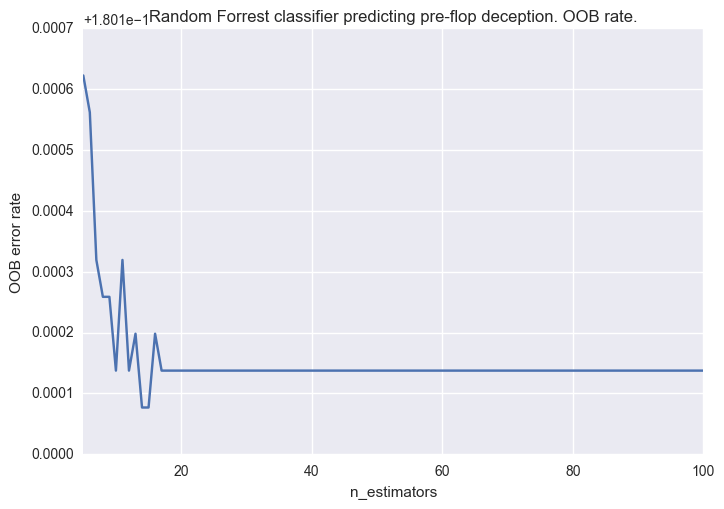

In [63]:
### OOB ERRORS
from pylab import figure, axes, pie, title, show, savefig

min_estimators = 5
max_estimators = 100
error_rate=[]

for i in range(min_estimators, max_estimators + 1):
        estimator_02.set_params(n_estimators=i, oob_score=True, warm_start=False)
        estimator_02.fit(x_train, y_train.values.ravel())
        
        oob_error = 1 - estimator_02.oob_score_
        error_rate.append((i, oob_error))
        

plt.plot(*zip(*error_rate))

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title('Random Forrest classifier predicting pre-flop deception. OOB rate.')
plt.show()

savefig('OOB_01.png', bbox_inches='tight')

In [64]:
estimator_03 = RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3, max_depth=None)
model_03=estimator_03.fit(x_train, y_train.values.ravel())

print (model_03.score(x_train, y_train.values.ravel()))



0.840542832909


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

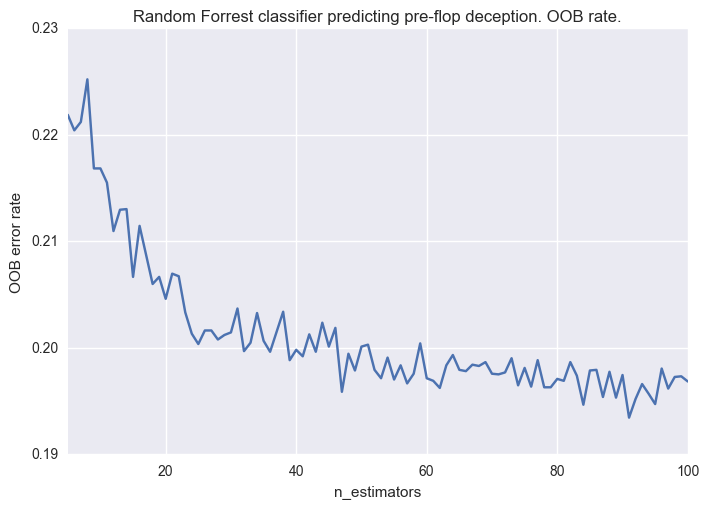

In [65]:
### OOB ERRORS 2

from pylab import figure, axes, pie, title, show, savefig

min_estimators = 5
max_estimators = 100
error_rate=[]

for i in range(min_estimators, max_estimators + 1):
        estimator_03.set_params(n_estimators=i, oob_score=True, warm_start=False)
        estimator_03.fit(x_train, y_train.values.ravel())
        
        oob_error = 1 - estimator_03.oob_score_
        error_rate.append((i, oob_error))
        

plt.plot(*zip(*error_rate))

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title('Random Forrest classifier predicting pre-flop deception. OOB rate.')
plt.show()

savefig('OOB_02.png', bbox_inches='tight')

25 trees used as a result of oob, samples leaf 25 greatly overfits which we observe by non existant variance, therefore we experiment until fin find convergence of learning curve (below) 5 chosen, max features 1, we choose sqrt instead, easier to compare later models. None deoth as suggested by cvgridsearch. 

In [66]:
### Plot learning curve

from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


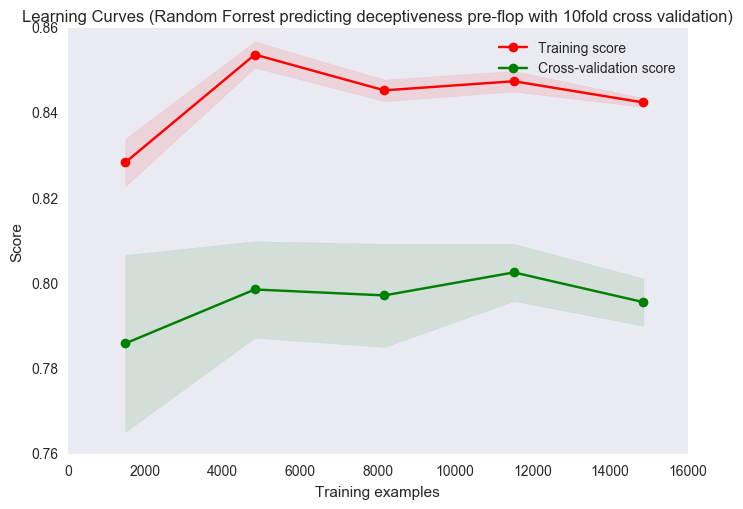

In [67]:
title = 'Learning Curves (Random Forrest predicting deceptiveness pre-flop with 10fold cross validation)'
plot_learning_curve(model_03, title, x_train, y_train.values.ravel(), cv=10)
plt.show()

savefig('learning_curve_1.png', bbox_inches='tight')

# Converges at 82%, underfitting, followed by overfitting, by convergence.

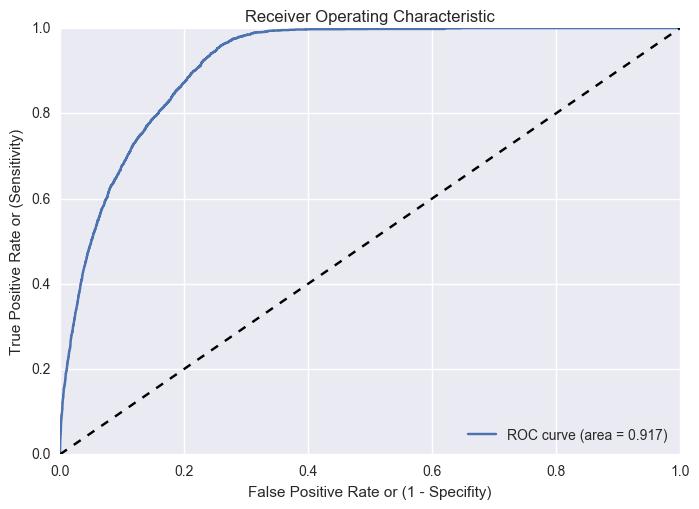

In [68]:
### Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve, auc

y_pred = model_03.predict(x_train)
y_pred_prob = model_03.predict_proba(x_train)

fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob[:,1])
roc_auc = auc(fpr,  tpr, reorder=True)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

savefig('AUCROC_01.png', bbox_inches='tight')

If we did not know that we are ommiting important variables we would think our model is doing really good, great area, we need to take a look at confusion matrix for closer examination. 

In [69]:
### CONFUSION MATRIX

y_pred = model_03.predict(x_train)
y_pred_prob = model_03.predict_proba(x_train)

from sklearn import metrics

print(metrics.confusion_matrix(y_train, y_pred, labels=None)) 
print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))

[[13452    79]
 [ 2527   448]]
0.916843389192


In [70]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[13452    79]
 [ 2527   448]]


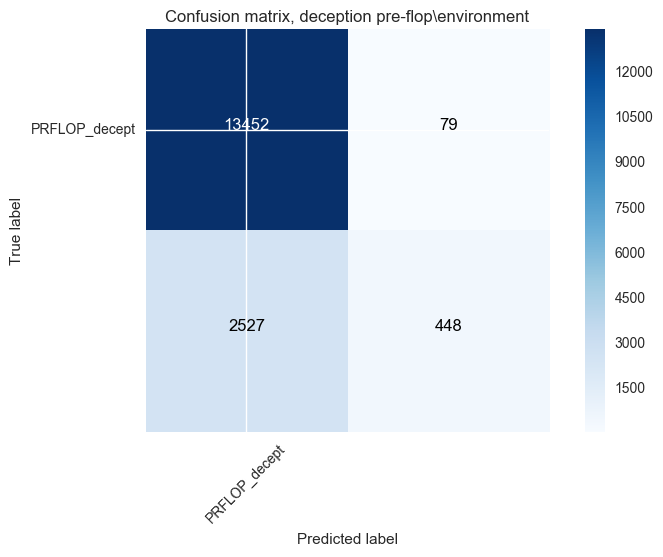

In [71]:
conf_matrix = metrics.confusion_matrix(y_train, y_pred, labels=None)
y_classes = list(y_train.columns.values)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=y_classes,
                      title='Confusion matrix, deception pre-flop\environment')

In [72]:
### Report

print(metrics.classification_report(y_train,
                              y_pred) )

             precision    recall  f1-score   support

          0       0.84      0.99      0.91     13531
          1       0.85      0.15      0.26      2975

avg / total       0.84      0.84      0.79     16506



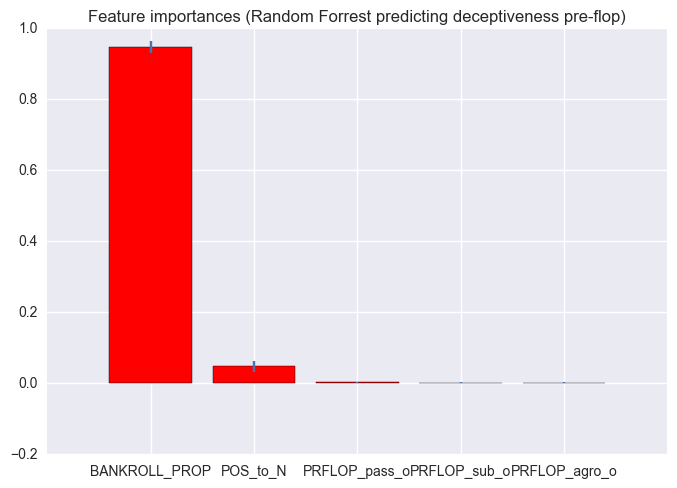

In [73]:
### Create a graph of feature importances.

importances = model_03.feature_importances_
x_features = list(x_train.columns.values)

std = np.std([tree.feature_importances_ for tree in model_03.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances (Random Forrest predicting deceptiveness pre-flop)")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train[indices])
plt.xlim([-1, x_train.shape[1]])
plt.show()
savefig('feature_i_01.png', bbox_inches='tight')

In [74]:
### IMPORTANCES

x_features = list(x_train.columns.values)

for feature, imp in sorted(zip(x_features, model_03.feature_importances_)):
    print(feature, imp)

BANKROLL_PROP 0.945703447018
POS_to_N 0.0483300837662
PRFLOP_agro_o 0.00166130879684
PRFLOP_pass_o 0.00257311514916
PRFLOP_sub_o 0.00173204526938


Bankroll prop returns a huge importance measure, definetely overfitting, however , as we are interested in relative importance rather than absolute we will keep an eye how it is goint to change in the subsequent models.

In [75]:
### CONTRIBUTIONS

from treeinterpreter import treeinterpreter as ti

x_features = list(x_train.columns.values)

instances = x_train

prediction, bias, contributions = ti.predict(model_03, instances)
totalc = np.mean(contributions[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc, 
                             x_features), reverse=True):
    print (feature, round(c, 5))




BANKROLL_PROP 0.00055
POS_to_N 7e-05
PRFLOP_agro_o 2e-05
PRFLOP_sub_o 0.0
PRFLOP_pass_o -0.0


In [76]:
### CHECK IF SUMS ARE CONSISTENT WITH THE MEANS (with above)

totalsum = np.sum(contributions[:,:,1], axis=0) 

for lst, v in (sorted(zip(x_features, totalsum)))[:10]:
    print (lst, v)

BANKROLL_PROP 9.13291479706
POS_to_N 1.17543289122
PRFLOP_agro_o 0.288469065092
PRFLOP_pass_o -0.00116936769039
PRFLOP_sub_o 0.0392830682238


Bankroll prop as expected , remains hugely important in absolute magnitude as well. Returning 13, while the next variable only 0.802.

In [77]:
from treeinterpreter import treeinterpreter as ti, utils
prediction_j, bias_j, contributions_j = ti.predict(model_03, x_train, joint_contribution=True)

# Lets take a look at joint contributions. http://blog.datadive.net/random-forest-interpretation-conditional-feature-contributions/

In [78]:
aggregated_contributions_j = utils.aggregated_contribution(contributions_j)

# Lets take a look at aggregated joint contributions.

In [79]:
aggregated_contributions_j = dict(zip(aggregated_contributions_j.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j.values())))

# Dictionary had been made.

In [80]:
res = []

for k in set(aggregated_contributions_j.keys()):
    res.append(([x_features[index] for index in k],
                aggregated_contributions_j.get(k,0)))

for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o', 'PRFLOP_sub_o'] [ 0.00021172]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o'] [ 0.00016438]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o'] [ 0.00012119]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_sub_o'] [ 0.00012041]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [  4.76841677e-05]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o'] [  4.21396010e-05]
['POS_to_N', 'BANKROLL_PROP'] [ -2.10663172e-05]
['BANKROLL_PROP', 'PRFLOP_sub_o'] [ -1.38101893e-05]
['BANKROLL_PROP', 'PRFLOP_pass_o'] [ -1.13492876e-05]
['BANKROLL_PROP', 'PRFLOP_pass_o', 'PRFLOP_sub_o'] [ -8.49270779e-06]


Latter position relative to the number of players, leads to the greater chance of deceptive play, on its own, and in combination with other features such as bankroll size, and opponents passiveness. Players may have more flexibility by acting late and having more chips. These envirnomental factors equip them with greater range of viable actions. Passiveness and submisiveness of previous oppoennt also contributes to imporving the range of viable actions.

### 1.5.1 Data analysis. Deception. Full.

In [81]:
# SPLIT TRAINING DATA INTO THREE DIFFERENT LAGS DATASETS

x_train_full = PDB_HDB.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o',\
                               'OUTCOME_lag1_sum', 'OUTCOME_lag5_sum', 'OUTCOME_lag10_sum', 'PRFLOP_agro_lag1',\
                               'PRFLOP_agro_lag5', 'PRFLOP_agro_lag10', 'PRFLOP_pass_lag1', 'PRFLOP_pass_lag5',\
                               'PRFLOP_pass_lag10', 'PRFLOP_sub_lag1', 'PRFLOP_sub_lag5', 'PRFLOP_sub_lag10',\
                               'PRFLOP_decept_lag1', 'PRFLOP_decept_lag5', 'PRFLOP_decept_lag10' ,'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]

x_train_lag1 = PDB_HDB.loc[:, ['PRFLOP_decept', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag1_sum', \
                               'PRFLOP_agro_lag1',\
                          'PRFLOP_pass_lag1', 'PRFLOP_sub_lag1', 'PRFLOP_decept_lag1',\
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_train_lag1.dropna(axis=0, how='any', inplace=True)
y_train_lag1 = x_train_lag1.loc[:, ['PRFLOP_decept']]
x_train_lag1 = x_train_lag1.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag1_sum', \
                               'PRFLOP_agro_lag1', \
                                    'PRFLOP_pass_lag1', 'PRFLOP_sub_lag1', 'PRFLOP_decept_lag1', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]


x_train_lag5 = PDB_HDB.loc[:, ['PRFLOP_decept', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o',\
                          'OUTCOME_lag5_sum', 'PRFLOP_agro_lag5', \
                           'PRFLOP_pass_lag5', 'PRFLOP_sub_lag5', \
                          'PRFLOP_decept_lag5', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_train_lag5.dropna(axis=0, how='any', inplace=True)
y_train_lag5 = x_train_lag5.loc[:, ['PRFLOP_decept']]
x_train_lag5 = x_train_lag5.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o',\
                          'OUTCOME_lag5_sum', 'PRFLOP_agro_lag5', \
                           'PRFLOP_pass_lag5', 'PRFLOP_sub_lag5', 'PRFLOP_decept_lag5',\
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]


x_train_lag10 = PDB_HDB.loc[:, ['PRFLOP_decept', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag10_sum', 'PRFLOP_agro_lag10',
                          'PRFLOP_pass_lag10', 'PRFLOP_sub_lag10',\
                          'PRFLOP_decept_lag10', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_train_lag10.dropna(axis=0, how='any', inplace=True)
y_train_lag10 = x_train_lag10.loc[:, ['PRFLOP_decept']]
x_train_lag10 = x_train_lag10.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag10_sum', 'PRFLOP_agro_lag10',
                          'PRFLOP_pass_lag10', 'PRFLOP_sub_lag10', 'PRFLOP_decept_lag10', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]



In [82]:
### Three machine learning models for three different lags.

estimator_lag_01 = RandomForestClassifier(n_estimators=25, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1)


model_lag1_01 = estimator_lag_01.fit(x_train_lag1, y_train_lag1.values.ravel())
model_lag5_01 = estimator_lag_01.fit(x_train_lag5, y_train_lag5.values.ravel())
model_lag10_01 = estimator_lag_01.fit(x_train_lag10, y_train_lag10.values.ravel())

print('The accuracy score of model with one hand lagged dynamics: ' , model_lag1_01.score(x_train_lag1, y_train_lag1.values.ravel()))
print('The accuracy score of model with five hand lagged dynamics: ', model_lag5_01.score(x_train_lag5, y_train_lag5.values.ravel()))
print('The accuracy score of model with ten hand lagged dynamics: ', model_lag10_01.score(x_train_lag10, y_train_lag10.values.ravel()))

The accuracy score of model with one hand lagged dynamics:  0.830186373358
The accuracy score of model with five hand lagged dynamics:  0.890916939015
The accuracy score of model with ten hand lagged dynamics:  0.998117706111


Third model with 10 hands dynamics severely overfitting, though all of them should return intersting feature importances as they all pick up rigid paterns.

In [83]:
### Cross validate theese three models.

print('10 fold cross-validated accuracy of the model if one hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag1_01, x_train_lag1, y_train_lag1.values.ravel(), cv=10))))
print('10 fold cross-validated accuracy of the model if five hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag5_01, x_train_lag5, y_train_lag5.values.ravel(), cv=10))))
print('10 fold cross-validated accuracy of the model if ten hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag10_01, x_train_lag10, y_train_lag10.values.ravel(), cv=10))))


10 fold cross-validated accuracy of the model if one hand lagged dynamics:  0.73469653329
10 fold cross-validated accuracy of the model if five hand lagged dynamics:  0.761491689998
10 fold cross-validated accuracy of the model if ten hand lagged dynamics:  0.74975070728


Again result is arround 74 % for all the models, unlike the orignal model, cross validated version does not show divergence, rather all models converge to the same mean. (which is 3 percent higher, in comparison to environment only model).

In [84]:
### Setting the best parameters of the first model, on the three short-term dynamics model.

estimator_lag_02 = RandomForestClassifier(n_estimators=500, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3, max_depth=None)

model_lag1_02= estimator_lag_02.fit(x_train_lag1, y_train_lag1.values.ravel())
model_lag5_02 = estimator_lag_02.fit(x_train_lag5, y_train_lag5.values.ravel())
model_lag10_02 = estimator_lag_02.fit(x_train_lag10, y_train_lag10.values.ravel())

print('The accuracy score of upgraded model with one hand lagged dynamics: ' , model_lag1_02.score(x_train_lag1, y_train_lag1.values.ravel()))
print('The accuracy score of upgraded model with five hand lagged dynamics: ', model_lag5_02.score(x_train_lag5, y_train_lag5.values.ravel()))
print('The accuracy score of upgraded model with ten hand lagged dynamics: ', model_lag10_02.score(x_train_lag10, y_train_lag10.values.ravel()))


The accuracy score of upgraded model with one hand lagged dynamics:  0.844912923923
The accuracy score of upgraded model with five hand lagged dynamics:  0.878954183881
The accuracy score of upgraded model with ten hand lagged dynamics:  0.954009285983


In [85]:
### Cross validate once more.

print('10 fold cross-validated accuracy of the upgraded model with one hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag1_02, x_train_lag1, y_train_lag1.values.ravel(), cv=10))))
print('10 fold cross-validated accuracy of the upgraded model with five hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag5_02, x_train_lag5, y_train_lag5.values.ravel(), cv=10))))
print('10 fold cross-validated accuracy of the upgraded model with ten hand lagged dynamics: ' ,(np.mean(cross_val_score(model_lag10_02, x_train_lag10, y_train_lag10.values.ravel(), cv=10))))


10 fold cross-validated accuracy of the upgraded model with one hand lagged dynamics:  0.774654163754
10 fold cross-validated accuracy of the upgraded model with five hand lagged dynamics:  0.781839605351
10 fold cross-validated accuracy of the upgraded model with ten hand lagged dynamics:  0.784557295884


We have a nice convergence towards 77% accuarcy in all three models in cross validated result. (seperate models also show convergence towards mid 80s)

In [86]:
### Get predictions and prediction probabilites.

y_pred_lag1 = model_lag1_02.predict(x_train_lag1)
y_pred_prob_lag1 = model_lag1_02.predict_proba(x_train_lag1)

y_pred_lag5 = model_lag5_02.predict(x_train_lag5)
y_pred_prob_lag5 = model_lag5_02.predict_proba(x_train_lag5)

y_pred_lag10 = model_lag10_02.predict(x_train_lag10)
y_pred_prob_lag10 = model_lag10_02.predict_proba(x_train_lag10)


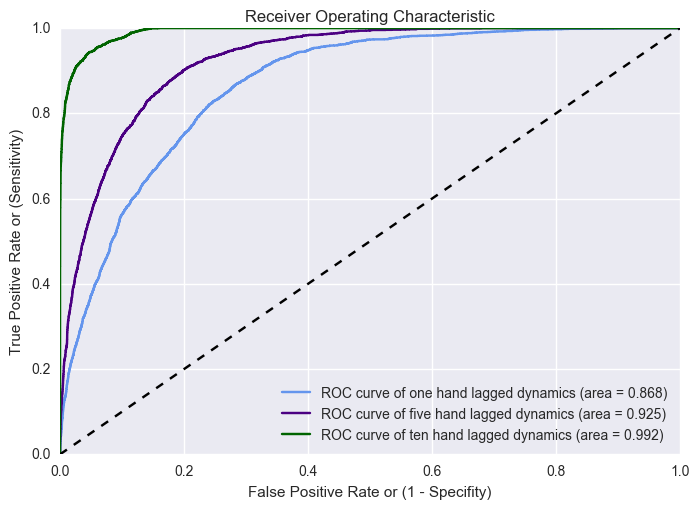

In [87]:
### Compute ROC curve and ROC area, draw the plot.


fpr_lag1, tpr_lag1, thresholds = roc_curve(y_train_lag1, y_pred_prob_lag1[:,1])
roc_auc_lag1 = auc(fpr_lag1,  tpr_lag1, reorder=True)

fpr_lag5, tpr_lag5, thresholds = roc_curve(y_train_lag5, y_pred_prob_lag5[:,1])
roc_auc_lag5 = auc(fpr_lag5,  tpr_lag5, reorder=True)

fpr_lag10, tpr_lag10, thresholds = roc_curve(y_train_lag10, y_pred_prob_lag10[:,1])
roc_auc_lag10 = auc(fpr_lag10,  tpr_lag10, reorder=True)


plt.plot(fpr_lag1, tpr_lag1, label='ROC curve of one hand lagged dynamics (area = %0.3f)' % roc_auc_lag1, color='cornflowerblue')
plt.plot(fpr_lag5, tpr_lag5, label='ROC curve of five hand lagged dynamics (area = %0.3f)' % roc_auc_lag5, color='indigo')
plt.plot(fpr_lag10, tpr_lag10, label='ROC curve of ten hand lagged dynamics (area = %0.3f)' % roc_auc_lag10, color='darkgreen')

plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

savefig('AUCROC_02.png', bbox_inches='tight')

[Comment]

In [88]:
### Confusion matrices.

print('The confusion matrix score of upgraded model with one hand lagged dynamics: ', (metrics.confusion_matrix(y_train_lag1, y_pred_lag1, labels=None))) 
print('The confusion matrix score of upgraded model with five hand lagged dynamics: ', (metrics.confusion_matrix(y_train_lag5, y_pred_lag5, labels=None))) 
print('The confusion matrix score of upgraded model with ten hand lagged dynamics: ', (metrics.confusion_matrix(y_train_lag10, y_pred_lag10, labels=None))) 


The confusion matrix score of upgraded model with one hand lagged dynamics:  [[13072   341]
 [ 2197   755]]
The confusion matrix score of upgraded model with five hand lagged dynamics:  [[12809   480]
 [ 1483  1445]]
The confusion matrix score of upgraded model with ten hand lagged dynamics:  [[12998    57]
 [  676  2207]]


In [89]:
print('The confusion report of upgraded model with one hand lagged dynamics: ', (metrics.classification_report(y_train_lag1, y_pred_lag1)))
print('The confusion report of upgraded model with five hand lagged dynamics: ', (metrics.classification_report(y_train_lag5, y_pred_lag5)))
print('The confusion report of upgraded model with ten hand lagged dynamics: ', (metrics.classification_report(y_train_lag10, y_pred_lag10)))

The confusion report of upgraded model with one hand lagged dynamics:               precision    recall  f1-score   support

          0       0.86      0.97      0.91     13413
          1       0.69      0.26      0.37      2952

avg / total       0.83      0.84      0.81     16365

The confusion report of upgraded model with five hand lagged dynamics:               precision    recall  f1-score   support

          0       0.90      0.96      0.93     13289
          1       0.75      0.49      0.60      2928

avg / total       0.87      0.88      0.87     16217

The confusion report of upgraded model with ten hand lagged dynamics:               precision    recall  f1-score   support

          0       0.95      1.00      0.97     13055
          1       0.97      0.77      0.86      2883

avg / total       0.95      0.95      0.95     15938



[LEAVE COMMENTS HERE LATER]

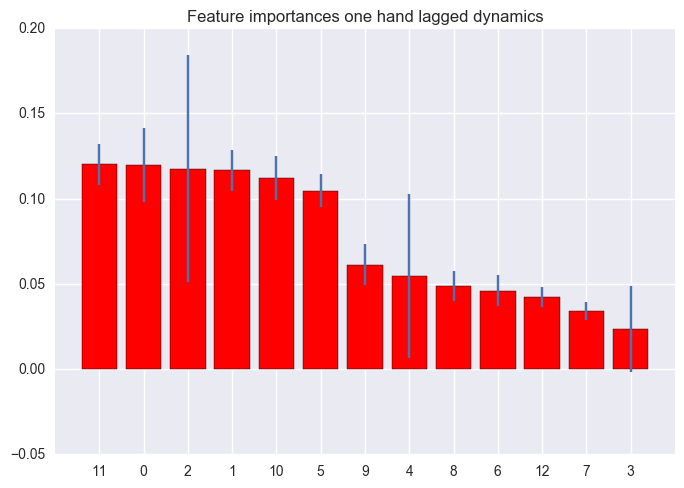

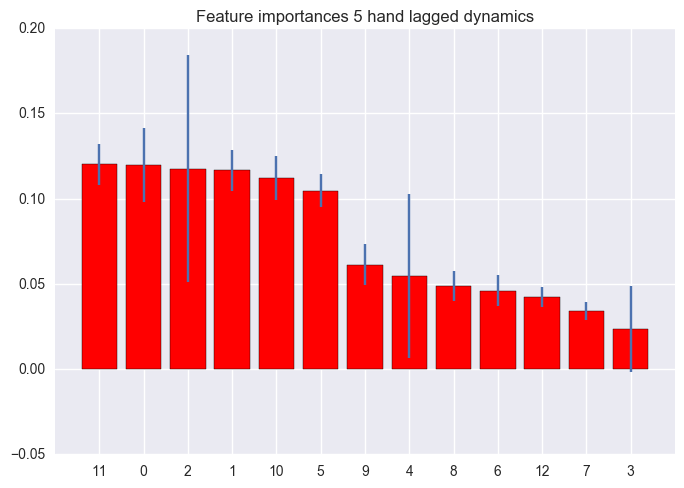

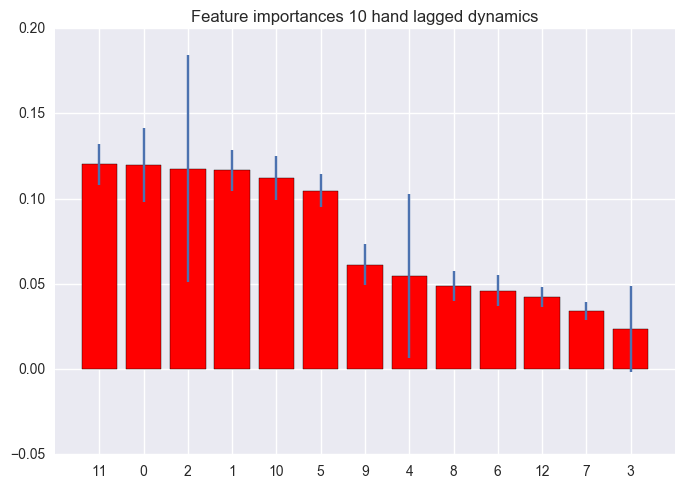

In [90]:
### Create a graph of feature importances.

importances_lag1 = model_lag1_02.feature_importances_
importances_lag5 = model_lag5_02.feature_importances_
importances_lag10 = model_lag10_02.feature_importances_

std_lag1 = np.std([tree.feature_importances_ for tree in model_lag1_02.estimators_],
             axis=0)
std_lag5 = np.std([tree.feature_importances_ for tree in model_lag5_02.estimators_],
             axis=0)
std_lag10 = np.std([tree.feature_importances_ for tree in model_lag10_02.estimators_],
             axis=0)

indices1 = np.argsort(importances_lag1)[::-1]
indices2 = np.argsort(importances_lag5)[::-1]
indices3 = np.argsort(importances_lag10)[::-1]


plt.figure(1)
plt.title("Feature importances one hand lagged dynamics")
plt.bar(range(x_train_lag1.shape[1]), importances_lag1[indices1],
       color="r", yerr=std_lag1[indices1], align="center")
plt.xticks(range(x_train_lag1.shape[1]), indices1)
plt.xlim([-1, x_train_lag1.shape[1]])
savefig('feature_i_02.png', bbox_inches='tight')

plt.figure(2)
plt.title("Feature importances 5 hand lagged dynamics")
plt.bar(range(x_train_lag5.shape[1]), importances_lag5[indices2],
       color="r", yerr=std_lag5[indices2], align="center")
plt.xticks(range(x_train_lag5.shape[1]), indices2)
plt.xlim([-1, x_train_lag5.shape[1]])
savefig('feature_i_03.png', bbox_inches='tight')

plt.figure(3)
plt.title("Feature importances 10 hand lagged dynamics")
plt.bar(range(x_train_lag10.shape[1]), importances_lag10[indices3],
       color="r", yerr=std_lag10[indices3], align="center")
plt.xticks(range(x_train_lag10.shape[1]), indices3)
plt.xlim([-1, x_train_lag10.shape[1]])
savefig('feature_i_04.png', bbox_inches='tight')


plt.show()


### Joint feature contributions lag 1 (too much time)

x_features_lag1 = list(x_train_lag1.columns.values)

prediction_j_lag1, bias_j_lag1, contributions_j_lag1 = ti.predict(model_lag1_02, x_train_lag1, joint_contribution=True)

aggregated_contributions_j_lag1 = utils.aggregated_contribution(contributions_j_lag1)

aggregated_contributions_j_lag1 = dict(zip(aggregated_contributions_j_lag1.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j_lag1.values())))


res_lag1 = []
for k in set(aggregated_contributions_j_lag1.keys()):
    res_lag1.append(([x_features_lag1[index] for index in k],
                aggregated_contributions_j_lag1.get(k,0)))
print('Top 10 feature contributions in 1 hand lagged dynamics model')
for lst, v in (sorted(res_lag1, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

### Joint feature contributions lag 5 (too much time)

x_features_lag5 = list(x_train_lag5.columns.values)

prediction_j_lag5, bias_j_lag5, contributions_j_lag5 = ti.predict(model_lag5_02, x_train_lag5, joint_contribution=True)

aggregated_contributions_j_lag5 = utils.aggregated_contribution(contributions_j_lag5)

aggregated_contributions_j_lag5 = dict(zip(aggregated_contributions_j_lag5.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j_lag5.values())))



res_lag5 = []
for k in set(aggregated_contributions_j_lag5.keys()):
    res_lag5.append(([x_features_lag5[index] for index in k],
                aggregated_contributions_j_lag5.get(k,0)))
print('Top 10 feature contributions in 5 hand lagged dynamics model')
for lst, v in (sorted(res_lag5, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)
print('')

### Joint feature contributions lag 10 (too much time)

x_features_lag10 = list(x_train_lag10.columns.values)

prediction_j_lag10, bias_j_lag10, contributions_j_lag10 = ti.predict(model_lag10_02, x_train_lag10, joint_contribution=True)

aggregated_contributions_j_lag10 = utils.aggregated_contribution(contributions_j_lag10)

aggregated_contributions_j_lag10 = dict(zip(aggregated_contributions_j_lag10.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j_lag10.values())))



res_lag10 = []
for k in set(aggregated_contributions_j_lag10.keys()):
    res_lag10.append(([x_features_lag10[index] for index in k],
                aggregated_contributions_j_lag10.get(k,0)))
print('Top 10 feature contributions in 5 hand lagged dynamics model')
for lst, v in (sorted(res_lag10, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)
print('')

[comment]

In [95]:
x_features_lag1 = list(x_train_lag1.columns.values)

x_features_lag5 = list(x_train_lag5.columns.values)

x_features_lag10 = list(x_train_lag10.columns.values)


In [93]:
### Feature contributions lag 1.

prediction_lag1, bias_lag1, contributions_lag1 = ti.predict(model_lag1_02, x_train_lag1)
totalc_lag1 = np.sum(contributions_lag1[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_lag1, 
                             x_features_lag1), reverse=True):
    print (feature, round(c, 5))

PRFLOP_decept_lag10 470.05265
PRFLOP_pass_lag10 56.98145
VICTORY_LAST 31.36301
PRFLOP_sub_lag10 25.9612
HANDS_PLAYED 20.22069
HAND_ID 11.17686
BANKROLL_PROP 6.51967
PRFLOP_pass_o -3.70345
PRFLOP_sub_o -10.23385
PRFLOP_agro_o -23.96171
POS_to_N -27.62419
OUTCOME_lag10_sum -93.25795
PRFLOP_agro_lag10 -195.71487


In [96]:
### Feature contributions lag 5
prediction_lag5, bias_lag5, contributions_lag5 = ti.predict(model_lag5_02, x_train_lag5)
totalc_lag5 = np.sum(contributions_lag5[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_lag5, 
                             x_features_lag5), reverse=True):
    print (feature, round(c, 5))
    

PRFLOP_decept_lag5 156.25345
PRFLOP_pass_lag5 28.13591
POS_to_N 28.03746
PRFLOP_sub_lag5 9.96499
HANDS_PLAYED 5.12593
VICTORY_LAST 3.68426
PRFLOP_pass_o -3.06015
HAND_ID -3.20945
PRFLOP_sub_o -3.59823
BANKROLL_PROP -6.18736
PRFLOP_agro_o -11.75936
PRFLOP_agro_lag5 -16.52461
OUTCOME_lag5_sum -26.1472


In [156]:
## Feature contributions lag 10

prediction_lag10, bias_lag10, contributions_lag10 = ti.predict(model_lag10_02, x_train_lag10)
totalc_lag10 = np.sum(contributions_lag10[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_lag10, 
                             x_features_lag10), reverse=True):
    print (feature, round(c, 5))

OUTCOME_lag10_sum 4.39341
HANDS_PLAYED 3.96567
BANKROLL_PROP 3.71263
HAND_ID 2.91803
PRFLOP_sub_lag10 2.19844
VICTORY_LAST 2.12641
PRFLOP_pass_lag10 1.59654
PRFLOP_agro_lag10 1.42131
PRFLOP_decept_lag10 1.18048
POS_to_N -0.08995
PRFLOP_sub_o -0.35692
PRFLOP_pass_o -0.5721
PRFLOP_agro_o -0.7264


### 1.5.3 Data analysis. Agressiveness, Passiveness, Submisivness. Environment 

In [98]:
### Get training and target datasets.

x_train = PDB_HDB.loc[:, ['PRFLOP_agro','PRFLOP_pass', 'PRFLOP_sub', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]
x_train = x_train[np.isfinite(x_train['PRFLOP_agro_o'])]

y_train = x_train.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub']]
x_train = x_train.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o']]

y_train.sort_index(level=1, inplace=True)

In [99]:
### Get the classifier, the model , score it. 

from sklearn.multiclass import OneVsRestClassifier

estimator_01 = OneVsRestClassifier(RandomForestClassifier(n_estimators=25, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
model_01 = estimator_01.fit(x_train, y_train)

print (model_01.score(x_train, y_train))

0.861020235066


In [100]:
### Cross validation.

print('10 fold cross-validated accuracy of the model with three classes: ' ,(np.mean(cross_val_score(model_01, x_train, y_train, cv=10))))


10 fold cross-validated accuracy of the model with three classes:  0.316489290237


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

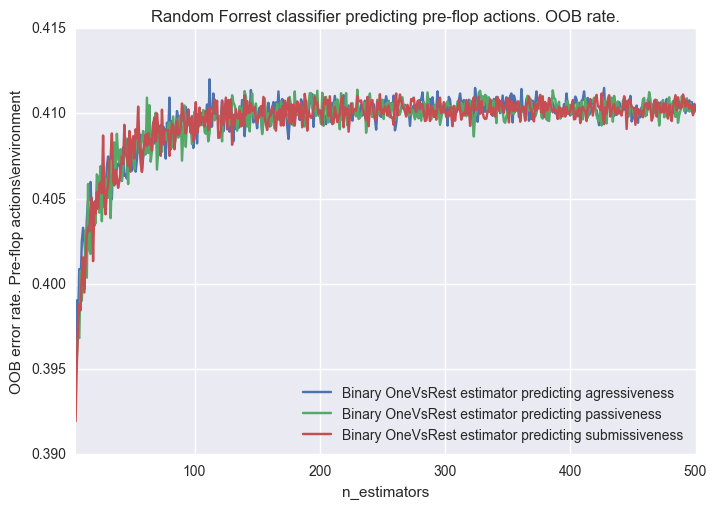

In [101]:
### Look at OOB to find out the best number of trees, fit model with it.
from collections import OrderedDict

min_estimators = 5
max_estimators = 500

estimator_list = estimator_01.estimators_ # List of estimators
labels_list = ['Binary OneVsRest estimator predicting agressiveness', 'Binary OneVsRest estimator predicting passiveness', 'Binary OneVsRest estimator predicting submissiveness'] #List of labels
estimators_dict = OrderedDict((label, []) for label, _ in zip(labels_list, estimator_list))

for i in range(min_estimators, max_estimators + 1):
    for label, est in zip(labels_list, estimator_list):
        
        est.set_params(n_estimators=i, oob_score=True, warm_start=False)
        est.fit(x_train, y_train)
    
        oob_error = 1 - est.oob_score_
        estimators_dict[label].append((i, oob_error)) 

for label, clf_err in estimators_dict.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate. Pre-flop actions\environment")
plt.legend(loc="lower right")
plt.title('Random Forrest classifier predicting pre-flop actions. OOB rate.')
plt.show()

savefig('OOB_03.png', bbox_inches='tight')



At 100 tres OOB stabilizes, variance is reduced, though the erorr increased a little bit. (not substantial in absolute terms) All models seem quite similar in their behaviour.

In [102]:
### Grid search for best parameters 1.

param_grid = {'estimator__max_features': [1,3,5], 'estimator__max_depth': [None, 3, 11], 'estimator__min_samples_leaf': [1,3,10] }

estimator_01 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
# Above we chooce 100 estimators based on OOB graph.

estimatorCvGrid_01 = GridSearchCV(estimator=estimator_01, cv=10, param_grid=param_grid)
estimatorCvGrid_01.fit(x_train, y_train)

print(estimatorCvGrid_01.best_params_)
print(estimatorCvGrid_01.best_score_)

{'estimator__max_features': 1, 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1}
0.33097055616139587


In [103]:
### Grid search for best parameters 2.

param_grid = {'estimator__max_depth': [11, 15, 21], 'estimator__min_samples_leaf': [10, 15, 20]}

estimatorCvGrid_01 = GridSearchCV(estimator=estimator_01, cv=10, param_grid=param_grid)
estimatorCvGrid_01.fit(x_train, y_train)

print(estimatorCvGrid_01.best_params_)
print(estimatorCvGrid_01.best_score_)

{'estimator__max_depth': 21, 'estimator__min_samples_leaf': 10}
0.11426148067369442


Two parameter grids had been created. Different combinations of max_features, max_depth and min_samples_leaf are being investigated. First grid seach returns, 1 max features (choose sqrt, as it is more scalable),  max_depth None (default) and default max leaves. Second search confirms the superiority of the first run. (11% against 33%) 

In [104]:
### Fit random forrest with best parameters. 

estimator_02 = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3, max_depth = None))

model_02 = estimator_02.fit(x_train, y_train)

print(model_02.score(x_train, y_train))

0.491942324003


In [105]:
### Cross validation

print('10 fold cross-validated accuracy of the model with three classes: ' ,(np.mean(cross_val_score(model_02, x_train, y_train, cv=10))))


10 fold cross-validated accuracy of the model with three classes:  0.219072004111


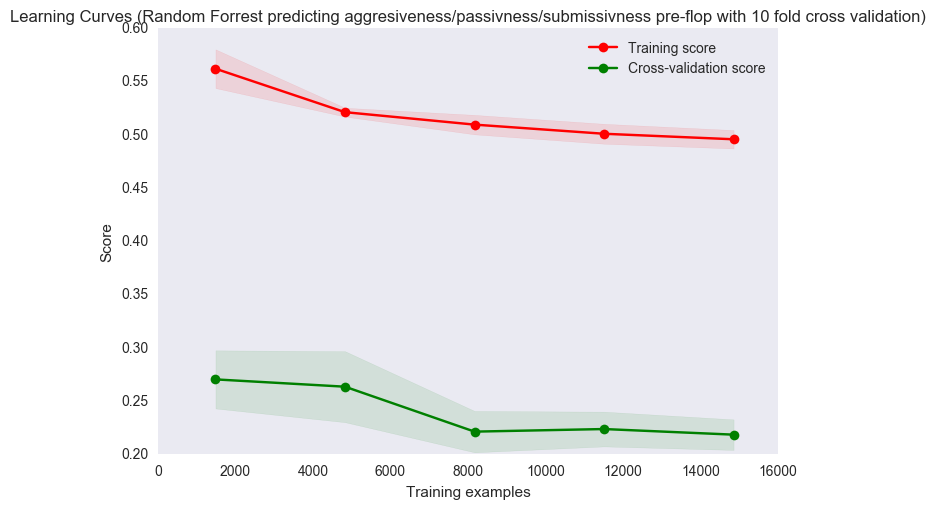

In [106]:
### Learning curves

title = 'Learning Curves (Random Forrest predicting aggresiveness/passivness/submissivness pre-flop with 10 fold cross validation)'
plot_learning_curve(model_02, title, x_train, y_train, cv=10)
plt.show()

From the learning curves we can observe that the model is not learning much, over time. Underfitting. 

In [107]:
### Get predictions

y_pred = model_02.predict(x_train)
y_pred_prob = model_02.predict_proba(x_train)

In [108]:
### CONFUSION matrices

for i in range(np.array(y_train).shape[1]):
    print("Confusion matrix {}".format(i))
    print(metrics.confusion_matrix(np.array(y_train)[:,i], y_pred[:,i]))
    print("")


Confusion matrix 0
[[10603   447]
 [ 3037  2419]]

Confusion matrix 1
[[12325   191]
 [ 2922  1068]]

Confusion matrix 2
[[8328 1118]
 [2401 4659]]



In [109]:
### Metrics report

print('The classification report report of model with three classes: ', (metrics.classification_report(y_train, y_pred)))

The classification report report of model with three classes:               precision    recall  f1-score   support

          0       0.84      0.44      0.58      5456
          1       0.85      0.27      0.41      3990
          2       0.81      0.66      0.73      7060

avg / total       0.83      0.49      0.60     16506



In [110]:
### ROC scores

from sklearn import metrics

for i in range(np.array(y_train).shape[1]):
    print("ROC score {}".format(i))
    print(metrics.roc_auc_score(np.array(y_train)[:,i], y_pred_prob[:,i]))
    print("")



ROC score 0
0.890195160627

ROC score 1
0.903865918792

ROC score 2
0.883116412721



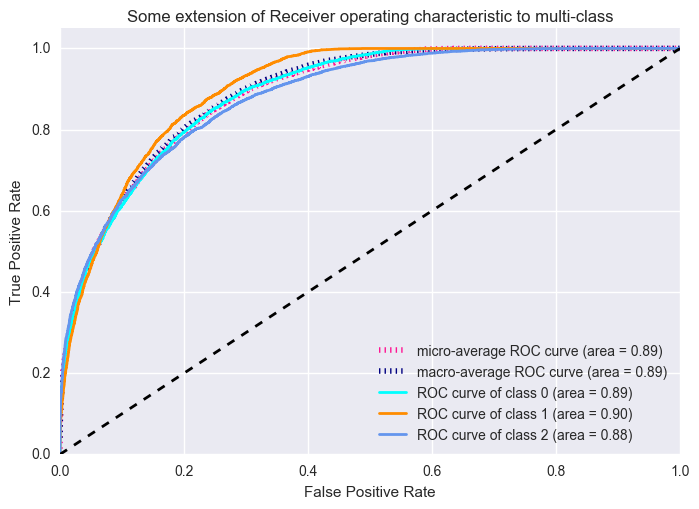

In [111]:
### ROC curves

y_classes = np.array(y_train).shape[1]
from scipy import interp
from itertools import cycle



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_train)[:, i], y_pred_prob[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
## Micro   
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_train).ravel(), y_pred_prob.ravel()) 
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Macro

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= y_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(y_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [112]:
### Grid search for best parameters 3.

param_grid = {'estimator__max_features': [1,'sqrt',5], 'estimator__max_depth': [None, 3, 11], 'estimator__min_samples_leaf': [1,3,10] }

estimator_03 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
# Above we chooce 100 estimators based on OOB graph.

estimatorCvGrid_03 = GridSearchCV(estimator=estimator_03, cv=10, param_grid=param_grid, scoring='f1_micro')
estimatorCvGrid_03.fit(x_train, y_train)

print(estimatorCvGrid_03.best_params_)
print(estimatorCvGrid_03.best_score_)

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages

{'estimator__max_features': 1, 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1}
0.33882300115776864


In [113]:
### Grid search for best parameters 4.

param_grid = {'estimator__max_features': [1,'sqrt',5], 'estimator__max_depth': [None, 3, 11], 'estimator__min_samples_leaf': [1,3,10] }

estimator_04 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
# Above we chooce 100 estimators based on OOB graph.

estimatorCvGrid_04 = GridSearchCV(estimator=estimator_04, cv=10, param_grid=param_grid, scoring='f1_macro')
estimatorCvGrid_04.fit(x_train, y_train)

print(estimatorCvGrid_04.best_params_)
print(estimatorCvGrid_04.best_score_)

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gedas\Anaco

{'estimator__max_features': 'sqrt', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1}
0.31664055541101627


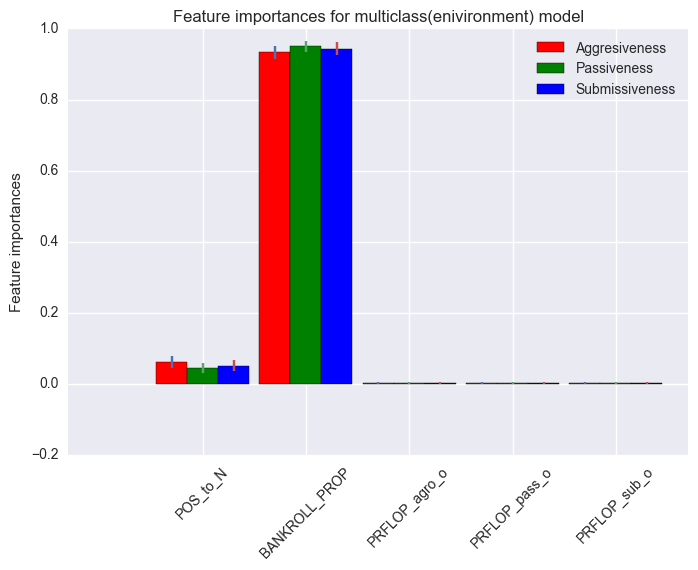

In [114]:
### Feature importances

importances = [est.feature_importances_ for est in model_02.estimators_]
x_features = list(x_train.columns.values)
est_list = model_02.estimators_


std = [(np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)) for est in model_02.estimators_]
indices = np.argsort(importances)[::-1]
width = 0.3
ind = np.arange(x_train.shape[1])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, importances[0], width, color='r', yerr=std[0], align='center')
rects2 = ax.bar(ind+width, importances[1], width, color='g', yerr=std[1], align='center')
rects3 = ax.bar(ind+2*width, importances[2], width, color='b', yerr=std[2], align='center')

ax.set_title('Feature importances for multiclass(enivironment) model')
ax.set_ylabel('Feature importances')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Aggresiveness', 'Passiveness', 'Submissiveness'))

ax.set_xticks(ind + width)
ax.set_xticklabels(x_features, rotation=45)

plt.show()

In [115]:
### Feature contributions (aggresiveness)

prediction_j1, bias_j1, contributions_j1 = ti.predict(est_list[0], x_train, joint_contribution=True)

aggregated_contributions_j1 = utils.aggregated_contribution(contributions_j1)

aggregated_contributions_j1 = dict(zip(aggregated_contributions_j1.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j1.values())))


In [116]:
res1 = []
for k in set(aggregated_contributions_j1.keys()):
    res1.append(([x_features[index] for index in k],
                aggregated_contributions_j1.get(k,0)))
print('Top 10 feature contributions in aggresiveness/environment model:')
for lst, v in (sorted(res1, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)
print('')

Top 10 feature contributions in aggresiveness/environment model:
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [ 0.00017526]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_sub_o'] [ 0.00014055]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o'] [  7.94887381e-05]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o'] [  7.94858083e-05]
['POS_to_N', 'BANKROLL_PROP'] [ -1.52625054e-05]
['BANKROLL_PROP', 'PRFLOP_agro_o'] [  9.59542894e-06]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o', 'PRFLOP_sub_o'] [  8.56733067e-06]
['BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [ -6.38584525e-06]
['BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o'] [  4.50182262e-06]
['BANKROLL_PROP'] [ -4.34638055e-06]



In [117]:
### Feature contributions (passiveness)

prediction_j2, bias_j2, contributions_j2= ti.predict(est_list[1], x_train, joint_contribution=True)

aggregated_contributions_j2= utils.aggregated_contribution(contributions_j2)

aggregated_contributions_j2=dict(zip(aggregated_contributions_j2.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j2.values())))


In [118]:
res2 = []
for k in set(aggregated_contributions_j2.keys()):
    res2.append(([x_features[index] for index in k],
                aggregated_contributions_j2.get(k,0)))
print('Top 10 feature contributions in aggresiveness/environment model:')
for lst, v in (sorted(res2, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)
print('')

Top 10 feature contributions in aggresiveness/environment model:
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [ 0.00033112]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o'] [ 0.0002736]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o'] [ 0.00011718]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o', 'PRFLOP_sub_o'] [ 0.00011379]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_sub_o'] [  8.63416752e-05]
['POS_to_N', 'BANKROLL_PROP'] [ -8.93853872e-06]
['BANKROLL_PROP', 'PRFLOP_agro_o'] [ -6.60010376e-06]
['POS_to_N'] [ -6.42947012e-06]
['BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [ -5.14913248e-06]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o'] [  4.24928104e-06]



In [119]:
### Feature contributions (submissivness)

prediction_j3, bias_j3, contributions_j3 = ti.predict(est_list[2], x_train, joint_contribution=True)

aggregated_contributions_j3 = utils.aggregated_contribution(contributions_j3)

aggregated_contributions_j3 = dict(zip(aggregated_contributions_j3.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j3.values())))


In [120]:
res3 = []
for k in set(aggregated_contributions_j3.keys()):
    res3.append(([x_features[index] for index in k],
                aggregated_contributions_j3.get(k,0)))
print('Top 10 feature contributions in aggresiveness/environment model:')
for lst, v in (sorted(res3, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)
print('')

Top 10 feature contributions in aggresiveness/environment model:
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_sub_o'] [ 0.00017773]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o'] [  6.79317589e-05]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o', 'PRFLOP_sub_o'] [  4.96706768e-05]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o'] [  4.62774574e-05]
['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_pass_o'] [ -3.69727845e-05]
['POS_to_N'] [ -1.45918070e-05]
['POS_to_N', 'BANKROLL_PROP'] [  7.82110084e-06]
['BANKROLL_PROP'] [ -7.71116674e-06]
['BANKROLL_PROP', 'PRFLOP_sub_o'] [ -6.96024352e-06]
['BANKROLL_PROP', 'PRFLOP_agro_o'] [  5.59340632e-06]



In [121]:
prediction_1, bias_1, contributions_1 = ti.predict(est_list[0], x_train)
totalc_1 = np.sum(contributions_1[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_1, 
                             x_features), reverse=True):
    print (feature, round(c, 5))
    

BANKROLL_PROP 6.67378
POS_to_N 0.95243
PRFLOP_pass_o -0.01877
PRFLOP_sub_o -0.06798
PRFLOP_agro_o -0.07512


In [122]:
prediction_2, bias_2, contributions_2 = ti.predict(est_list[1], x_train)
totalc_2 = np.sum(contributions_2[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_2, 
                             x_features), reverse=True):
    print (feature, round(c, 5))
    

BANKROLL_PROP 13.68093
POS_to_N 1.01724
PRFLOP_sub_o 0.13916
PRFLOP_agro_o 0.04663
PRFLOP_pass_o 0.03745


In [131]:
prediction_3, bias_3, contributions_3 = ti.predict(est_list[2], x_train)
totalc_3 = np.sum(contributions_3[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_3, 
                             x_features), reverse=True):
    print (feature, round(c, 5))
    

BANKROLL_PROP 6.10459
PRFLOP_agro_o -0.02652
PRFLOP_sub_o -0.0593
PRFLOP_pass_o -0.06475
POS_to_N -1.09384


### 1.5.3 Data analysis. Agreesiveness, Passiveness, Submisivness. Environment + Lagged Dynamics 

In [56]:
### Splitting the data into training and target datasets.


x_trainLag1 = PDB_HDB.loc[:, ['PRFLOP_agro','PRFLOP_pass', 'PRFLOP_sub', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag1_sum', \
                               'PRFLOP_agro_lag1',\
                          'PRFLOP_pass_lag1', 'PRFLOP_sub_lag1',\
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_trainLag1.dropna(axis=0, how='any', inplace=True)
y_trainLag1 = x_trainLag1.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub']]
x_trainLag1 = x_trainLag1.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag1_sum', \
                               'PRFLOP_agro_lag1', \
                                    'PRFLOP_pass_lag1', 'PRFLOP_sub_lag1',\
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]


x_trainLag5 = PDB_HDB.loc[:, ['PRFLOP_agro','PRFLOP_pass', 'PRFLOP_sub', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o',\
                          'OUTCOME_lag5_sum', 'PRFLOP_agro_lag5', \
                           'PRFLOP_pass_lag5', 'PRFLOP_sub_lag5', \
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_trainLag5.dropna(axis=0, how='any', inplace=True)
y_trainLag5 = x_trainLag5.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub']]
x_trainLag5 = x_trainLag5.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag5_sum', 'PRFLOP_agro_lag5', 'PRFLOP_pass_lag5', 'PRFLOP_sub_lag5', 'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]


x_trainLag10 = PDB_HDB.loc[:, ['PRFLOP_agro','PRFLOP_pass', 'PRFLOP_sub', 'POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag10_sum', 'PRFLOP_agro_lag10',
                          'PRFLOP_pass_lag10', 'PRFLOP_sub_lag10', \
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]
x_trainLag10.dropna(axis=0, how='any', inplace=True)
y_trainLag10 = x_trainLag10.loc[:, ['PRFLOP_agro', 'PRFLOP_pass', 'PRFLOP_sub']]
x_trainLag10 = x_trainLag10.loc[:, ['POS_to_N', 'BANKROLL_PROP', 'PRFLOP_agro_o', 'PRFLOP_pass_o', 'PRFLOP_sub_o', 'OUTCOME_lag10_sum', 'PRFLOP_agro_lag10',
                          'PRFLOP_pass_lag10', 'PRFLOP_sub_lag10', \
                          'HANDS_PLAYED', 'HAND_ID', 'VICTORY_LAST']]


In [134]:
### Building first models

estimatorLag1_01 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
modelLag1_01 = estimatorLag1_01.fit(x_trainLag1, y_trainLag1)

estimatorLag5_01 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
modelLag5_01 = estimatorLag1_01.fit(x_trainLag5, y_trainLag5)

estimatorLag10_01 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=1))
modelLag10_01 = estimatorLag1_01.fit(x_trainLag10, y_trainLag10)

print('Accuracy of model 1 full/lag 1: ' , (modelLag1_01.score(x_trainLag1, y_trainLag1)))
print('Accuracy of model 1 full/lag 5: ' , (modelLag5_01.score(x_trainLag5, y_trainLag5)))
print('Accuracy of model 1 full/lag10: ', (modelLag10_01.score(x_trainLag10, y_trainLag10)))

Accuracy of model 1 full/lag 1:  0.565230675222
Accuracy of model 1 full/lag 5:  0.718320281186
Accuracy of model 1 full/lag10:  0.99993725687


In [135]:
### Cross validate

print('10 fold cross-validated accuracy of the model full\lag 1: ' ,(np.mean(cross_val_score(modelLag1_01, x_trainLag1, y_trainLag1, cv=10))))
print('10 fold cross-validated accuracy of the model full\lag 5: ' ,(np.mean(cross_val_score(modelLag5_01, x_trainLag5, y_trainLag5, cv=10))))
print('10 fold cross-validated accuracy of the model full\lag 10: ' ,(np.mean(cross_val_score(modelLag10_01, x_trainLag10, y_trainLag10, cv=10))))


10 fold cross-validated accuracy of the model full\lag 1:  0.504549439684
10 fold cross-validated accuracy of the model full\lag 5:  0.514572758439
10 fold cross-validated accuracy of the model full\lag 10:  0.527035115204


In [62]:
### Fit the best parameters (from environment model)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from treeinterpreter import treeinterpreter as ti


estimatorLag1_02 = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3))
modelLag1_02 = estimatorLag1_02.fit(x_trainLag1, y_trainLag1)

estimatorLag5_02 = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3))
modelLag5_02 = estimatorLag5_02.fit(x_trainLag5, y_trainLag5)

estimatorLag10_02 = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_features = 'sqrt', min_samples_split=2, min_samples_leaf=3))
modelLag10_02 = estimatorLag10_02.fit(x_trainLag10, y_trainLag10)

print(modelLag1_02.score(x_trainLag1, y_trainLag1))
print(modelLag5_02.score(x_trainLag5, y_trainLag5))
print(modelLag10_02.score(x_trainLag10, y_trainLag10))

0.82945310113
0.852192144046
0.861839628561


In [137]:
### Cross validate 2

print('10 fold cross-validated accuracy of the model actions\1 hand lag: ' ,(np.mean(cross_val_score(modelLag1_02, x_trainLag1, y_trainLag1, cv=10))))
print('10 fold cross-validated accuracy of the model actions\5 hand lag: ' ,(np.mean(cross_val_score(modelLag5_02, x_trainLag5, y_trainLag5, cv=10))))
print('10 fold cross-validated accuracy of the model actions\10 hand lag: ' ,(np.mean(cross_val_score(modelLag10_02, x_trainLag10, y_trainLag10, cv=10))))

10 fold cross-validated accuracy of the model agressivnessull:  0.512186777948
10 fold cross-validated accuracy of the model passivnessull:  0.529247598756
10 fold cross-validated accuracy of the model submissivnessull:  0.546608515455


In [138]:
### Get predictions and prediction probabilites.

y_predLag1 = modelLag1_02.predict(x_trainLag1)
y_pred_probLag1 = modelLag1_02.predict_proba(x_trainLag1)

y_predLag5 = modelLag5_02.predict(x_trainLag5)
y_pred_probLag5 = modelLag5_02.predict_proba(x_trainLag5)

y_predLag10 = modelLag10_02.predict(x_trainLag10)
y_pred_probLag10 = modelLag10_02.predict_proba(x_trainLag10)




In [139]:
### Plotting confusion matrices 1 hand lag

for i in range(np.array(y_trainLag1).shape[1]):
    print("Confusion matrix 1 hand lags {}".format(i))
    print(metrics.confusion_matrix(np.array(y_trainLag1)[:,i], y_predLag1[:,i]))
    print("")

Confusion matrix 1 hand lags 0
[[10666   262]
 [  726  4711]]

Confusion matrix 1 hand lags 1
[[12261   146]
 [ 1332  2626]]

Confusion matrix 1 hand lags 2
[[8763  632]
 [ 660 6310]]



In [140]:
### Plotting confusion matrices 5 hand lag


for i in range(np.array(y_trainLag5).shape[1]):
    print("Confusion matrix 5 hand lags {}".format(i))
    print(metrics.confusion_matrix(np.array(y_trainLag5)[:,i], y_predLag5[:,i]))
    print("")

Confusion matrix 5 hand lags 0
[[10598   238]
 [  611  4770]]

Confusion matrix 5 hand lags 1
[[12210    80]
 [ 1104  2823]]

Confusion matrix 5 hand lags 2
[[8824  484]
 [ 562 6347]]



In [141]:
### Plotting confusion matrices 10 hand lag


for i in range(np.array(y_trainLag10).shape[1]):
    print("Confusion matrix 10 hand lags {}".format(i))
    print(metrics.confusion_matrix(np.array(y_trainLag10)[:,i], y_predLag10[:,i]))
    print("")

Confusion matrix 10 hand lags 0
[[10391   225]
 [  602  4720]]

Confusion matrix 10 hand lags 1
[[12016    71]
 [ 1006  2845]]

Confusion matrix 10 hand lags 2
[[8746  427]
 [ 512 6253]]



In [142]:
### Metrics report 1 hand lags

print('The confusion report of full model with one hand lagged dynamics with three classes: ', (metrics.classification_report(y_trainLag1, y_predLag1)))


The confusion report of full model with one hand lagged dynamics with three classes:               precision    recall  f1-score   support

          0       0.95      0.87      0.91      5437
          1       0.95      0.66      0.78      3958
          2       0.91      0.91      0.91      6970

avg / total       0.93      0.83      0.88     16365



In [143]:
### Metrics report 5 hand lags

print('The confusion report of full model with five hand lagged dynamics with three classes: ', (metrics.classification_report(y_trainLag5, y_predLag5)))


The confusion report of full model with five hand lagged dynamics with three classes:               precision    recall  f1-score   support

          0       0.95      0.89      0.92      5381
          1       0.97      0.72      0.83      3927
          2       0.93      0.92      0.92      6909

avg / total       0.95      0.86      0.90     16217



In [144]:
### Metrics report 10 hand lags

print('The confusion report of full model with ten hand lagged dynamics with three classes: ', (metrics.classification_report(y_trainLag10, y_predLag10)))


The confusion report of full model with ten hand lagged dynamics with three classes:               precision    recall  f1-score   support

          0       0.95      0.89      0.92      5322
          1       0.98      0.74      0.84      3851
          2       0.94      0.92      0.93      6765

avg / total       0.95      0.87      0.91     15938



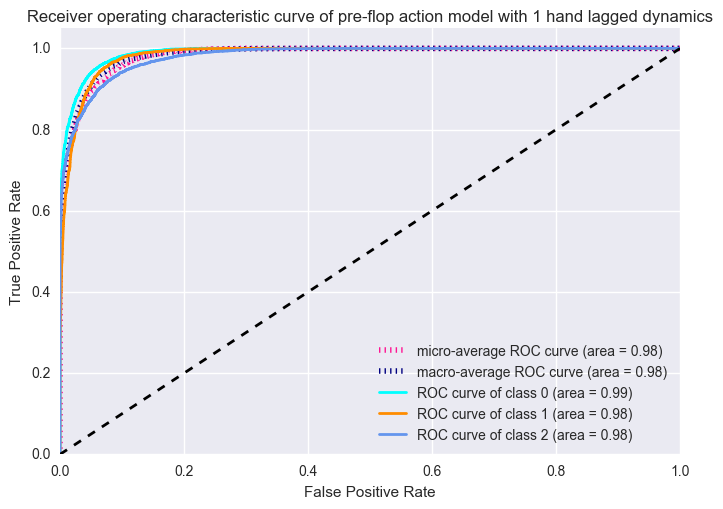

In [145]:
y_classes = np.array(y_trainLag1).shape[1]
from scipy import interp
from itertools import cycle



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_trainLag1)[:, i], y_pred_probLag1[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
## Micro   
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_trainLag1).ravel(), y_pred_probLag1.ravel()) 
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Macro

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= y_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(y_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of pre-flop action model with 1 hand lagged dynamics')
plt.legend(loc="lower right")
plt.show()

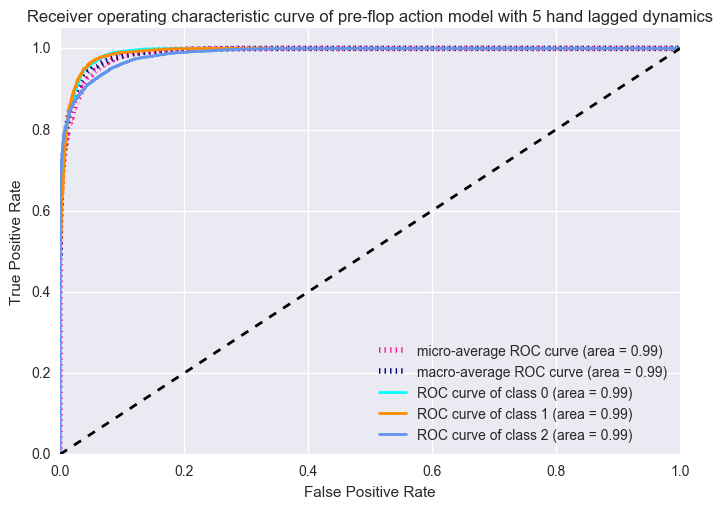

In [146]:
y_classes = np.array(y_trainLag5).shape[1]
from scipy import interp
from itertools import cycle



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_trainLag5)[:, i], y_pred_probLag5[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
## Micro   
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_trainLag5).ravel(), y_pred_probLag5.ravel()) 
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Macro

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= y_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(y_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of pre-flop action model with 5 hand lagged dynamics')
plt.legend(loc="lower right")
plt.show()

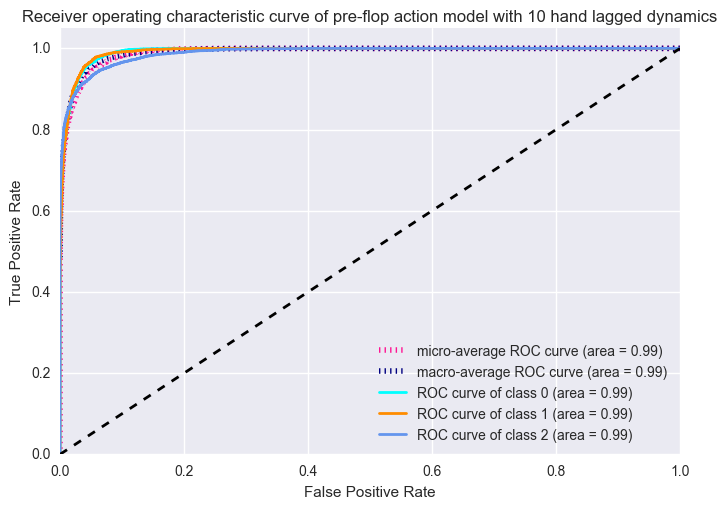

In [147]:
y_classes = np.array(y_trainLag10).shape[1]
from scipy import interp
from itertools import cycle



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_trainLag10)[:, i], y_pred_probLag10[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
## Micro   
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_trainLag10).ravel(), y_pred_probLag10.ravel()) 
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Macro

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= y_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(y_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of pre-flop action model with 10 hand lagged dynamics')
plt.legend(loc="lower right")
plt.show()

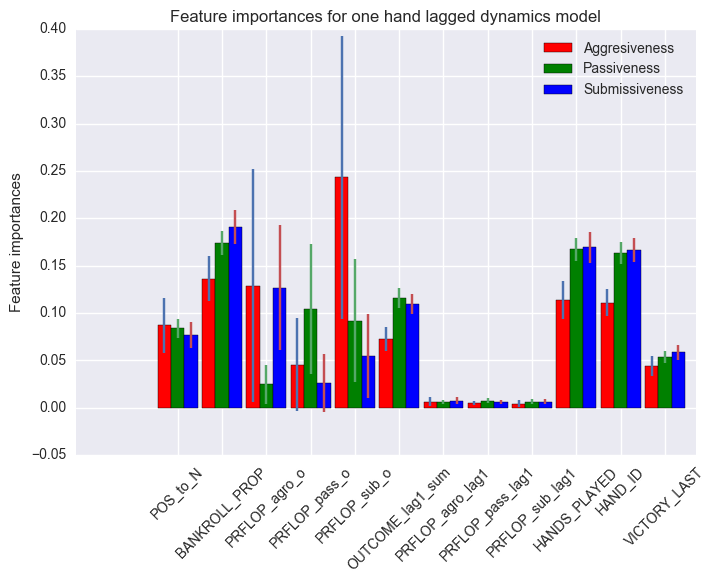

In [153]:
### Feature importances 1

importancesLag1 = [est.feature_importances_ for est in modelLag1_02.estimators_]
x_featuresLag1 = list(x_trainLag1.columns.values)
est_listLag1 = modelLag1_02.estimators_


std = [(np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)) for est in modelLag1_02.estimators_]
indices = np.argsort(importancesLag1)[::-1]
width = 0.3
ind = np.arange(x_trainLag1.shape[1])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, importancesLag1[0], width, color='r', yerr=std[0], align='center')
rects2 = ax.bar(ind+width, importancesLag1[1], width, color='g', yerr=std[1], align='center')
rects3 = ax.bar(ind+2*width, importancesLag1[2], width, color='b', yerr=std[2], align='center')

ax.set_title('Feature importances for one hand lagged dynamics model')
ax.set_ylabel('Feature importances')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Aggresiveness', 'Passiveness', 'Submissiveness'))

ax.set_xticks(ind + width)
ax.set_xticklabels(x_featuresLag1, rotation=45)

plt.show()

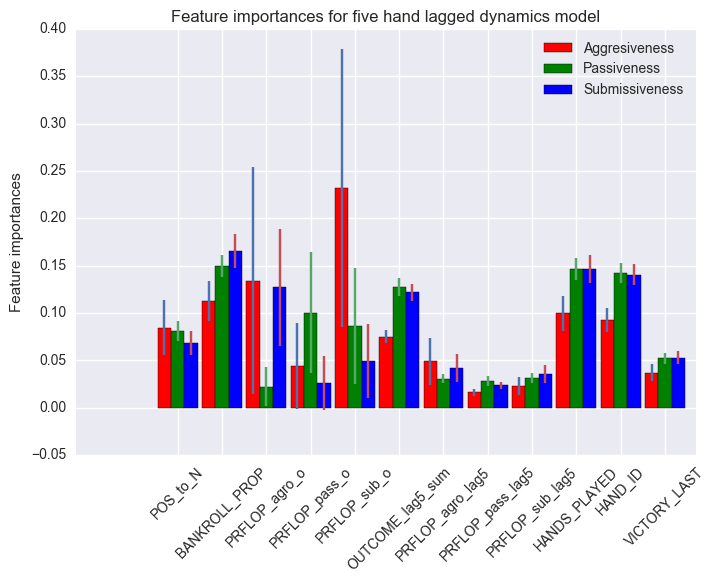

In [154]:
### Feature importances 2

importancesLag5 = [est.feature_importances_ for est in modelLag5_02.estimators_]
x_featuresLag5 = list(x_trainLag5.columns.values)
est_listLag5 = modelLag5_02.estimators_


std = [(np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)) for est in modelLag5_02.estimators_]
indices = np.argsort(importancesLag5)[::-1]
width = 0.3
ind = np.arange(x_trainLag5.shape[1])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, importancesLag5[0], width, color='r', yerr=std[0], align='center')
rects2 = ax.bar(ind+width, importancesLag5[1], width, color='g', yerr=std[1], align='center')
rects3 = ax.bar(ind+2*width, importancesLag5[2], width, color='b', yerr=std[2], align='center')

ax.set_title('Feature importances for five hand lagged dynamics model')
ax.set_ylabel('Feature importances')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Aggresiveness', 'Passiveness', 'Submissiveness'))

ax.set_xticks(ind + width)
ax.set_xticklabels(x_featuresLag5, rotation=45) # iF does not fit use indices.

plt.show()

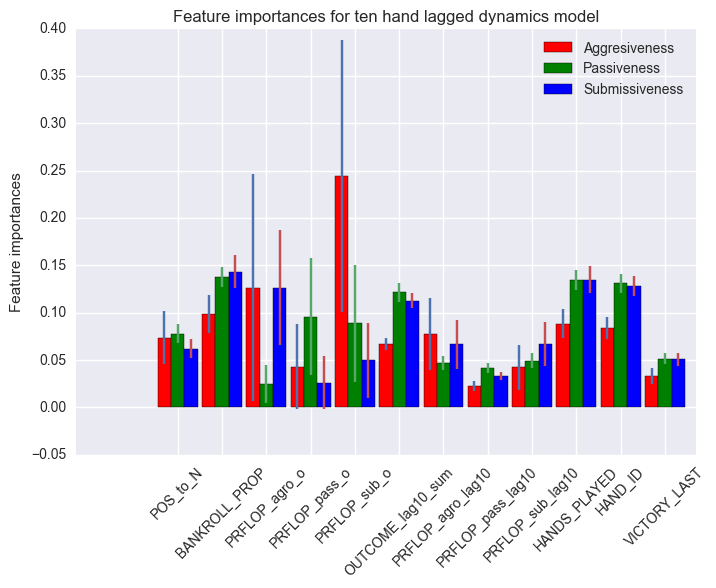

In [155]:
### Feature importances 3

importancesLag10 = [est.feature_importances_ for est in modelLag10_02.estimators_]
x_featuresLag10 = list(x_trainLag10.columns.values)
est_listLag10 = modelLag10_02.estimators_


std = [(np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)) for est in modelLag10_02.estimators_]
indices = np.argsort(importancesLag10)[::-1]
width = 0.3
ind = np.arange(x_trainLag10.shape[1])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, importancesLag10[0], width, color='r', yerr=std[0], align='center')
rects2 = ax.bar(ind+width, importancesLag10[1], width, color='g', yerr=std[1], align='center')
rects3 = ax.bar(ind+2*width, importancesLag10[2], width, color='b', yerr=std[2], align='center')

ax.set_title('Feature importances for ten hand lagged dynamics model')
ax.set_ylabel('Feature importances')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Aggresiveness', 'Passiveness', 'Submissiveness'))

ax.set_xticks(ind + width)
ax.set_xticklabels(x_featuresLag10, rotation=45) # iF does not fit use indices.

plt.show()

In [63]:
### Create three lists of estimators.

estimatorLag1_list = estimatorLag1_02.estimators_ # List of estimators

estimatorLag5_list = estimatorLag5_02.estimators_ # List of estimators

estimatorLag10_list = estimatorLag10_02.estimators_ # List of estimators


In [64]:
x_featuresLag1 = list(x_trainLag1.columns.values)
x_featuresLag5 = list(x_trainLag5.columns.values)
x_featuresLag10 = list(x_trainLag10.columns.values)


In [65]:
prediction_agrolag1, bias_agrolag1, contributions_agrolag1 = ti.predict(estimatorLag1_list[0], x_trainLag1)
totalc_agrolag1 = np.sum(contributions_agrolag1[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_agrolag1, 
                             x_featuresLag1), reverse=True):
    print (feature, round(c, 5))

BANKROLL_PROP 4.47779
POS_to_N 2.52849
HAND_ID 2.50516
OUTCOME_lag1_sum 2.05446
HANDS_PLAYED 1.7001
VICTORY_LAST 1.55587
PRFLOP_sub_o 0.76974
PRFLOP_agro_o 0.36588
PRFLOP_agro_lag1 0.24378
PRFLOP_sub_lag1 0.1783
PRFLOP_pass_lag1 -0.06934
PRFLOP_pass_o -0.56935


In [66]:
prediction_passlag1, bias_passlag1, contributions_passlag1 = ti.predict(estimatorLag1_list[1], x_trainLag1)
totalc_passlag1 = np.sum(contributions_passlag1[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_passlag1, 
                             x_featuresLag1), reverse=True):
    print (feature, round(c, 5))

BANKROLL_PROP 5.11764
HANDS_PLAYED 4.53033
HAND_ID 4.32264
POS_to_N 2.16348
VICTORY_LAST 2.02762
OUTCOME_lag1_sum 1.61406
PRFLOP_sub_lag1 0.53605
PRFLOP_agro_lag1 0.44577
PRFLOP_pass_lag1 0.33203
PRFLOP_sub_o -0.0605
PRFLOP_pass_o -0.27115
PRFLOP_agro_o -0.64068


In [67]:
prediction_sublag1, bias_sublag1, contributions_sublag1 = ti.predict(estimatorLag1_list[2], x_trainLag1)
totalc_sublag1 = np.sum(contributions_sublag1[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_sublag1, 
                             x_featuresLag1), reverse=True):
    print (feature, round(c, 5))

PRFLOP_sub_lag1 0.01292
PRFLOP_agro_lag1 -0.14702
PRFLOP_agro_o -0.16688
PRFLOP_pass_lag1 -0.19429
HAND_ID -0.20629
PRFLOP_pass_o -0.8351
BANKROLL_PROP -0.88139
PRFLOP_sub_o -0.9464
VICTORY_LAST -1.35794
OUTCOME_lag1_sum -1.42841
POS_to_N -3.61739
HANDS_PLAYED -4.94609


In [68]:
prediction_agrolag5, bias_agrolag5, contributions_agrolag5 = ti.predict(estimatorLag5_list[0], x_trainLag5)
totalc_agrolag5 = np.sum(contributions_agrolag5[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_agrolag5, 
                             x_featuresLag5), reverse=True):
    print (feature, round(c, 5))

BANKROLL_PROP 3.20024
HANDS_PLAYED 2.88859
POS_to_N 2.31293
PRFLOP_sub_o 2.23458
HAND_ID 2.02498
VICTORY_LAST 1.87732
OUTCOME_lag5_sum 1.57135
PRFLOP_agro_lag5 1.40733
PRFLOP_pass_lag5 0.59852
PRFLOP_sub_lag5 0.26265
PRFLOP_agro_o -0.45827
PRFLOP_pass_o -1.03254


In [69]:
prediction_passlag5, bias_passlag5, contributions_passlag5 = ti.predict(estimatorLag5_list[1], x_trainLag5)
totalc_passlag5 = np.sum(contributions_passlag5[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_passlag5, 
                             x_featuresLag5), reverse=True):
    print (feature, round(c, 5))

OUTCOME_lag5_sum 4.79331
BANKROLL_PROP 4.20519
HANDS_PLAYED 3.98854
HAND_ID 3.88235
POS_to_N 2.51778
VICTORY_LAST 2.46303
PRFLOP_agro_lag5 1.33505
PRFLOP_pass_lag5 1.22761
PRFLOP_sub_lag5 0.85529
PRFLOP_pass_o 0.59863
PRFLOP_sub_o 0.30479
PRFLOP_agro_o -0.02994


In [70]:
prediction_sublag5, bias_sublag5, contributions_sublag5 = ti.predict(estimatorLag5_list[2], x_trainLag5)
totalc_sublag5 = np.sum(contributions_sublag5[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_sublag5, 
                             x_featuresLag5), reverse=True):
    print (feature, round(c, 5))

OUTCOME_lag5_sum 3.31953
BANKROLL_PROP 2.98757
PRFLOP_agro_lag5 0.74799
PRFLOP_sub_o 0.63999
PRFLOP_agro_o 0.62088
PRFLOP_pass_lag5 0.16617
PRFLOP_pass_o 0.04415
PRFLOP_sub_lag5 -0.17087
HAND_ID -0.37007
VICTORY_LAST -1.3769
POS_to_N -2.64554
HANDS_PLAYED -3.36706


In [71]:
prediction_agrolag10, bias_agrolag10, contributions_agrolag10 = ti.predict(estimatorLag10_list[0], x_trainLag10)
totalc_agrolag10 = np.sum(contributions_agrolag10[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_agrolag10, 
                             x_featuresLag10), reverse=True):
    print (feature, round(c, 5))

HANDS_PLAYED 3.86341
POS_to_N 3.26601
VICTORY_LAST 2.42206
PRFLOP_sub_o 1.90308
HAND_ID 1.44511
PRFLOP_agro_lag10 1.39635
PRFLOP_pass_lag10 1.1996
BANKROLL_PROP 0.7245
PRFLOP_sub_lag10 0.60192
OUTCOME_lag10_sum 0.56615
PRFLOP_agro_o -0.04343
PRFLOP_pass_o -1.03557


In [72]:
prediction_passlag10, bias_passlag10, contributions_passlag10 = ti.predict(estimatorLag10_list[1], x_trainLag10)
totalc_passlag10 = np.sum(contributions_passlag10[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_passlag10, 
                             x_featuresLag10), reverse=True):
    print (feature, round(c, 5))

HANDS_PLAYED 5.73711
OUTCOME_lag10_sum 5.15423
BANKROLL_PROP 4.20529
HAND_ID 3.87461
VICTORY_LAST 3.16086
PRFLOP_pass_lag10 2.21508
PRFLOP_sub_lag10 1.80725
PRFLOP_agro_lag10 1.68541
POS_to_N 1.26572
PRFLOP_sub_o 0.09969
PRFLOP_pass_o -0.31248
PRFLOP_agro_o -0.37111


In [75]:
prediction_sublag10, bias_sublag10, contributions_sublag10 = ti.predict(estimatorLag10_list[2], x_trainLag10)
totalc_sublag10 = np.sum(contributions_sublag10[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc_sublag10, 
                             x_featuresLag10), reverse=True):
    print (feature, round(c, 5))

OUTCOME_lag10_sum 2.91602
HAND_ID 2.25205
BANKROLL_PROP 2.01125
PRFLOP_agro_lag10 1.72665
PRFLOP_agro_o 0.3681
PRFLOP_sub_o 0.22437
PRFLOP_pass_lag10 -0.13291
PRFLOP_pass_o -0.58499
PRFLOP_sub_lag10 -1.20003
HANDS_PLAYED -1.56235
VICTORY_LAST -2.74599
POS_to_N -3.29372


In [ ]:
STOP

### EXTRA. Joint contributions. (takes a looong time to calculate)

In [ ]:
### FEATURE CONTRIBUTIONS. Aggresiveness\one hand lag.

prediction_jagro_lag1, bias_jagro_lag1, contributions_jagro_lag1 = ti.predict(estimatorLag1_list[0], x_train_lag1, joint_contribution=True)

aggregated_contributions_jagro_lag1 = utils.aggregated_contribution(contributions_jagro_lag1)

aggregated_contributions_jagro_lag1 = dict(zip(aggregated_contributions_jagro_lag1.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jagro_lag1.values())))


res= []
for k in set(aggregated_contributions_jagro_lag1.keys()):
    res.append(([x_features_lag1[index] for index in k],
                aggregated_contributions_jagro_lag1.get(k,0)))
print('Top 10 feature contributions in 1 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Passivness\one hand lag.

prediction_jpass_lag1, bias_jpass_lag1, contributions_jpass_lag1 = ti.predict(estimatorLag1_list[1], x_train_lag1, joint_contribution=True)

aggregated_contributions_jpass_lag1 = utils.aggregated_contribution(contributions_jpass_lag1)

aggregated_contributions_jpass_lag1 = dict(zip(aggregated_contributions_jpass_lag1.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jpass_lag1.values())))


res = []
for k in set(aggregated_contributions_jpass_lag1.keys()):
    res.append(([x_features_lag1[index] for index in k],
                aggregated_contributions_jpass_lag1.get(k,0)))
print('Top 10 feature contributions in 1 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Submisivness\one hand lag.

prediction_jsub_lag1, bias_jsub_lag1, contributions_jsub_lag1 = ti.predict(estimatorLag1_list[2], x_train_lag1, joint_contribution=True)

aggregated_contributions_jsub_lag1 = utils.aggregated_contribution(contributions_jsub_lag1)

aggregated_contributions_jsub_lag1 = dict(zip(aggregated_contributions_jsub_lag1.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jsub_lag1.values())))


res = []
for k in set(aggregated_contributions_jsub_lag1.keys()):
    res.append(([x_features_lag1[index] for index in k],
                aggregated_contributions_jsub_lag1.get(k,0)))
print('Top 10 feature contributions in 1 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Agressiveness\five hand lag

prediction_jagro_lag5, bias_jagro_lag5, contributions_jagro_lag5 = ti.predict(estimatorLag5_list[0], x_train_lag5, joint_contribution=True)

aggregated_contributions_j_lag5 = utils.aggregated_contribution(contributions_j_lag5)

aggregated_contributions_j_lag5 = dict(zip(aggregated_contributions_j_lag5.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j_lag5.values())))


res = []
for k in set(aggregated_contributions_j_lag1.keys()):
    res.append(([x_features_lag5[index] for index in k],
                aggregated_contributions_j_lag5.get(k,0)))
print('Top 10 feature contributions in 5 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Passiveness\five hand lag.

prediction_jpass_lag5, bias_jpass_lag5, contributions_jpass_lag5 = ti.predict(estimatorLag5_list[1], x_train_lag5, joint_contribution=True)

aggregated_contributions_jpass_lag5 = utils.aggregated_contribution(contributions_jpass_lag5)

aggregated_contributions_jpass_lag5 = dict(zip(aggregated_contributions_jpass_lag5.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jpass_lag5.values())))


res = []
for k in set(aggregated_contributions_jpass_lag5.keys()):
    res.append(([x_features_lag5[index] for index in k],
                aggregated_contributions_jpass_lag5.get(k,0)))
print('Top 10 feature contributions in 5 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Submisivness\five hand lag.

prediction_jsub_lag5, bias_jsub_lag5, contributions_jsub_lag5 = ti.predict(estimatorLag1_list[2], x_train_lag5, joint_contribution=True)

aggregated_contributions_jsub_lag5 = utils.aggregated_contribution(contributions_jsub_lag5)

aggregated_contributions_jsub_lag5 = dict(zip(aggregated_contributions_jsub_lag5.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jsub_lag5.values())))


res = []
for k in set(aggregated_contributions_jsub_lag5.keys()):
    res.append(([x_features_lag5[index] for index in k],
                aggregated_contributions_jsub_lag5.get(k,0)))
print('Top 10 feature contributions in 5 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Agressiveness\ten hand lag

prediction_jagro_lag10, bias_jagro_lag10, contributions_jagro_lag10 = ti.predict(estimatorLag10_list[0], x_train_lag10, joint_contribution=True)

aggregated_contributions_j_lag10 = utils.aggregated_contribution(contributions_j_lag10)

aggregated_contributions_j_lag10 = dict(zip(aggregated_contributions_j_lag10.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_j_lag10.values())))


res = []
for k in set(aggregated_contributions_j_lag10.keys()):
    res.append(([x_features_lag10[index] for index in k],
                aggregated_contributions_j_lag10.get(k,0)))
print('Top 10 feature contributions in 10 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Passiveness\ten hand lag.

prediction_jpass_lag10, bias_jpass_lag10, contributions_jpass_lag10 = ti.predict(estimatorLag10_list[1], x_train_lag10, joint_contribution=True)

aggregated_contributions_jpass_lag10 = utils.aggregated_contribution(contributions_jpass_lag10)

aggregated_contributions_jpass_lag10 = dict(zip(aggregated_contributions_jpass_lag10.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jpass_lag10.values())))


res = []
for k in set(aggregated_contributions_jpass_lag10.keys()):
    res.append(([x_features_lag10[index] for index in k],
                aggregated_contributions_jpass_lag10.get(k,0)))
print('Top 10 feature contributions in 10 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

In [ ]:
### FEATURE CONTRIBUTIONS. Submisivness\ten hand lag.

prediction_jsub_lag10, bias_jsub_lag10, contributions_jsub_lag10 = ti.predict(estimatorLag1_list[2], x_train_lag10, joint_contribution=True)

aggregated_contributions_jsub_lag10 = utils.aggregated_contribution(contributions_jsub_lag10)

aggregated_contributions_jsub_lag10 = dict(zip(aggregated_contributions_jsub_lag10.keys(), map(lambda x: np.delete(x, 0), aggregated_contributions_jsub_lag10.values())))


res = []
for k in set(aggregated_contributions_jsub_lag10.keys()):
    res.append(([x_features_lag10[index] for index in k],
                aggregated_contributions_jsub_lag10.get(k,0)))
print('Top 10 feature contributions in 10 hand lagged dynamics model')
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)